In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import datetime as dt

In [2]:
df=pd.read_excel('E:\\DigiCrome\\Summer Internship NextHikes\\Project5\\telcom_data.xlsx',sheet_name='Sheet1')

In [3]:
df.iloc[0:5,0:15]

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes)
0,13042425973016899584,2019-04-27 17:21:49,39.0,2019-04-28 01:15:14,856.0,28405.0,2.082019e+14,3.367945e+10,3.568081e+13,D21039C,47.0,7.0,10416.0,358.0,39040.0
1,7349883256549310464,2019-04-26 17:05:56,92.0,2019-04-29 09:12:54,885.0,230818.0,2.082014e+14,3.366957e+10,3.520921e+13,D12476A,25.0,2.0,23.0,40.0,NaN
2,13114483554847000576,2019-04-25 05:38:52,125.0,2019-04-26 07:35:21,876.0,93389.0,2.082019e+14,3.368483e+10,8.655450e+13,D40281B,39.0,0.0,31.0,46.0,NaN
3,6917537695508209664,2019-04-27 16:29:10,347.0,2019-04-28 00:39:10,254.0,29399.0,2.082010e+14,3.365088e+10,3.579881e+13,W73271A,120.0,10.0,19346.0,1426.0,14154880.0
4,7349883254674050048,2019-04-26 07:41:48,793.0,2019-04-27 11:42:43,218.0,100854.0,2.082015e+14,3.375292e+10,3.586081e+13,T19483A,23.0,1.0,42.0,58.0,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Start ms,150000.0,4.991882e+02,2.886118e+02,0.000000e+00,2.500000e+02,4.990000e+02,7.490000e+02,9.990000e+02
End ms,150000.0,4.988009e+02,2.880977e+02,0.000000e+00,2.510000e+02,5.000000e+02,7.500000e+02,9.990000e+02
Dur. (ms),150000.0,1.046086e+05,8.103762e+04,7.142000e+03,5.744050e+04,8.639900e+04,1.324302e+05,1.859336e+06
IMSI,149431.0,2.082016e+14,2.148809e+10,2.040471e+14,2.082014e+14,2.082015e+14,2.082018e+14,2.140743e+14
MSISDN/Number,148935.0,4.188282e+10,2.447443e+12,3.360100e+10,3.365130e+10,3.366371e+10,3.368349e+10,8.823971e+14
IMEI,149429.0,4.847455e+13,2.241637e+13,4.400152e+11,3.546071e+13,3.572201e+13,8.611970e+13,9.900120e+13
Avg RTT DL (ms),122172.0,1.097957e+02,6.197827e+02,0.000000e+00,3.200000e+01,4.500000e+01,7.000000e+01,9.692300e+04
Avg RTT UL (ms),122189.0,1.766288e+01,8.479352e+01,0.000000e+00,2.000000e+00,5.000000e+00,1.500000e+01,7.120000e+03
Avg Bearer TP DL (kbps),150000.0,1.330005e+04,2.397188e+04,0.000000e+00,4.300000e+01,6.300000e+01,1.971075e+04,3.781600e+05
Avg Bearer TP UL (kbps),150000.0,1.770429e+03,4.625356e+03,0.000000e+00,4.700000e+01,6.300000e+01,1.120000e+03,5.861300e+04


**Null Value check in DataFrame**

In [6]:
df.isnull().sum()

Bearer Id                                        0
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

**Dimension of Data Frame in Row and Column**

In [7]:
df.shape

(150001, 55)

**Checking For Duplicates In BearerID and MSISDN/Number Features**

In [8]:
df['Bearer Id'].duplicated().value_counts()

False    134709
True      15292
Name: Bearer Id, dtype: int64

In [9]:
df['MSISDN/Number'].duplicated().value_counts()

False    106857
True      43144
Name: MSISDN/Number, dtype: int64

In [10]:
# Find the mode of 'Bearer Id'
bearer_id_mode = df['Bearer Id'].mode()[0]  # Get the first mode if multiple exist

print(f"The mode of Bearer ID is: {bearer_id_mode}")

The mode of Bearer ID is: 


**Find the 2nd Most Occuring Bearer ID**

In [11]:
# Find the value counts of 'Bearer Id'
bearer_id_counts = df['Bearer Id'].value_counts()
bearer_id_counts

# Get the second most occurring Bearer ID
if len(bearer_id_counts) >= 2:
  second_most_occurring_bearer_id = bearer_id_counts.index[1]
  print(f"The second most occurring Bearer ID is: {second_most_occurring_bearer_id}")
else:
  print("There are not enough unique Bearer IDs to find the second most occurring one.")

The second most occurring Bearer ID is: 13042425979269199872


**Finding the Mode of MSISDN/Number**

In [12]:
df['MSISDN/Number'].mode()

0    3.362632e+10
Name: MSISDN/Number, dtype: float64

**Handling  null values present in dataset**

In [13]:

#Filling missing values with the mean
# for numerical features
for column in df.select_dtypes(include=np.number):
  df[column].fillna(df[column].mean(), inplace=True)

# for categorical features
for column in df.select_dtypes(include='object'):
  df[column].fillna(df[column].mode()[0], inplace=True)


In [14]:

# Check for null values after handling them
print(df.isnull().sum())

Bearer Id                                   0
Start                                       1
Start ms                                    0
End                                         1
End ms                                      0
Dur. (ms)                                   0
IMSI                                        0
MSISDN/Number                               0
IMEI                                        0
Last Location Name                          0
Avg RTT DL (ms)                             0
Avg RTT UL (ms)                             0
Avg Bearer TP DL (kbps)                     0
Avg Bearer TP UL (kbps)                     0
TCP DL Retrans. Vol (Bytes)                 0
TCP UL Retrans. Vol (Bytes)                 0
DL TP < 50 Kbps (%)                         0
50 Kbps < DL TP < 250 Kbps (%)              0
250 Kbps < DL TP < 1 Mbps (%)               0
DL TP > 1 Mbps (%)                          0
UL TP < 10 Kbps (%)                         0
10 Kbps < UL TP < 50 Kbps (%)     

**Finding Unique values in Data Set Features**

In [15]:
df[['Bearer Id','IMEI','MSISDN/Number']].nunique()

Bearer Id        134709
IMEI             107271
MSISDN/Number    106857
dtype: int64

**Conduct a Non-Graphical Univariate Analysis by computing dispersion
parameters for each quantitative variable and provide useful interpretation**

In [16]:
# Compute dispersion parameters for quantitative variables
quantitative_variables = df.select_dtypes(include=np.number).columns

for variable in quantitative_variables:
  print(f"\nDispersion parameters for {variable}:")
  print(f"Range: {df[variable].max() - df[variable].min()}")
  print(f"Interquartile Range (IQR): {df[variable].quantile(0.75) - df[variable].quantile(0.25)}")
  print(f"Variance: {df[variable].var()}")
  print(f"Standard Deviation: {df[variable].std()}")




Dispersion parameters for Start ms:
Range: 999.0
Interquartile Range (IQR): 499.0
Variance: 83296.23555408377
Standard Deviation: 288.6108722035325

Dispersion parameters for End ms:
Range: 999.0
Interquartile Range (IQR): 499.0
Variance: 82999.70444456577
Standard Deviation: 288.09669287335765

Dispersion parameters for Dur. (ms):
Range: 1852194.0
Interquartile Range (IQR): 74988.0
Variance: 6567052314.330903
Standard Deviation: 81037.35135313161

Dispersion parameters for IMSI:
Range: 10027194860177.0
Interquartile Range (IQR): 370342358.0
Variance: 4.5998344342440156e+20
Standard Deviation: 21447224608.89524

Dispersion parameters for MSISDN/Number:
Range: 882363507487729.0
Interquartile Range (IQR): 33222169.0
Variance: 5.947410209612819e+24
Standard Deviation: 2438731270479.1436

Dispersion parameters for IMEI:
Range: 98561186125774.0
Interquartile Range (IQR): 50657094738467.0
Variance: 5.005775587867316e+26
Standard Deviation: 22373590654759.277

Dispersion parameters for Avg R

**Interpretation**

**Range: The range provides the spread of the data from the minimum to the maximum value. A larger range indicates a wider dispersion of data.**


**IQR: The interquartile range measures the spread of the middle 50% of the data. It's less affected by outliers compared to the range.**

**Variance: It measures how far a set of numbers are spread out from their average value. A larger variance implies a greater spread.**


**Standard Deviation: The square root of variance, indicating the average deviation of data points from the mean. A higher standard deviation suggests more variability in the data.**


**Conduct a Graphical Univariate Analysis by identifying the most suitable plotting options for each variable and interpreting your findings.**

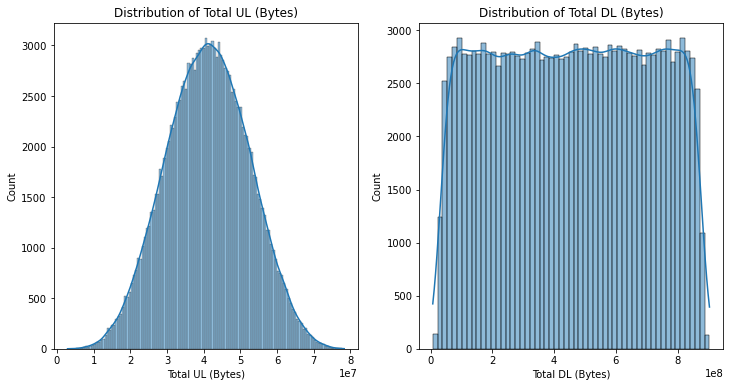

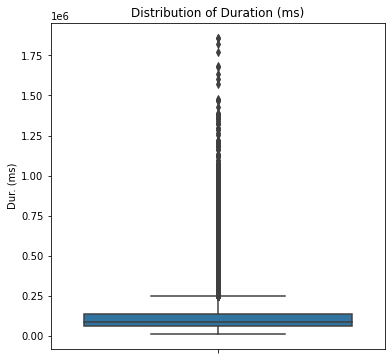

In [17]:
# Univariate Analysis for Numerical Features

# Histogram for Total UL (Uplink) and DL (Downlink)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Total UL (Bytes)'], kde=True)
plt.title('Distribution of Total UL (Bytes)')

plt.subplot(1, 2, 2)
sns.histplot(df['Total DL (Bytes)'], kde=True)
plt.title('Distribution of Total DL (Bytes)')
plt.show()

# Boxplot for Duration
plt.figure(figsize=(6, 6))
sns.boxplot(y=df['Dur. (ms)'])
plt.title('Distribution of Duration (ms)')
plt.show()



# Bar plot for the most frequent occurring values
for column in df.select_dtypes(include='object'):
  if df[column].nunique() <= 10: # Limit to avoid overcrowding for very large categories
    plt.figure(figsize=(8, 4))
    value_counts = df[column].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

# Interpretation:
# - Observe the counts for each category of other categorical features. This helps identify the most
#   frequent categories and understand the distribution of values within those features.

**Interpretation:**
**Total UL/DL:  Skewed distributions suggest most users have relatively low data usage,**

**with a few users responsible for a large portion of the overall data traffic.**
**Duration: Boxplot reveals potential outliers (long durations), indicating some calls/sessions**
**might be unusually longer than the average.**

# Univariate Analysis for Categorical Features

**Interpretation:**
**Handset Manufacturer: Visualize the popularity of different handset brands. It helps
   understand which brands are used most frequently by users.**
   

**Finding Skewness of the DataSet**

In [18]:
# Calculate skewness for numerical features
skewness = df.select_dtypes(include=np.number).skew()
print(skewness)

Start ms                                      0.000968
End ms                                       -0.001163
Dur. (ms)                                     3.952622
IMSI                                         41.124164
MSISDN/Number                               333.342413
IMEI                                          1.073519
Avg RTT DL (ms)                              69.705161
Avg RTT UL (ms)                              31.530109
Avg Bearer TP DL (kbps)                       2.589445
Avg Bearer TP UL (kbps)                       4.503428
TCP DL Retrans. Vol (Bytes)                  24.840677
TCP UL Retrans. Vol (Bytes)                 141.035684
DL TP < 50 Kbps (%)                          -2.303600
50 Kbps < DL TP < 250 Kbps (%)                3.279706
250 Kbps < DL TP < 1 Mbps (%)                 4.577678
DL TP > 1 Mbps (%)                            5.383899
UL TP < 10 Kbps (%)                          -9.008830
10 Kbps < UL TP < 50 Kbps (%)                10.972894
50 Kbps < 

**Post Null Value Treatment, DataSet Description**

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Start ms,150001.0,4.991882e+02,2.886109e+02,0.000000e+00,2.500000e+02,4.990000e+02,7.490000e+02,9.990000e+02
End ms,150001.0,4.988009e+02,2.880967e+02,0.000000e+00,2.510000e+02,5.000000e+02,7.500000e+02,9.990000e+02
Dur. (ms),150001.0,1.046086e+05,8.103735e+04,7.142000e+03,5.744200e+04,8.639900e+04,1.324300e+05,1.859336e+06
IMSI,150001.0,2.082016e+14,2.144722e+10,2.040471e+14,2.082014e+14,2.082015e+14,2.082018e+14,2.140743e+14
MSISDN/Number,150001.0,4.188282e+10,2.438731e+12,3.360100e+10,3.365151e+10,3.366380e+10,3.368473e+10,8.823971e+14
IMEI,150001.0,4.847455e+13,2.237359e+13,4.400152e+11,3.546261e+13,3.572241e+13,8.611970e+13,9.900120e+13
Avg RTT DL (ms),150001.0,1.097957e+02,5.593426e+02,0.000000e+00,3.500000e+01,5.400000e+01,1.097957e+02,9.692300e+04
Avg RTT UL (ms),150001.0,1.766288e+01,7.652993e+01,0.000000e+00,3.000000e+00,7.000000e+00,1.766288e+01,7.120000e+03
Avg Bearer TP DL (kbps),150001.0,1.330005e+04,2.397180e+04,0.000000e+00,4.300000e+01,6.300000e+01,1.971000e+04,3.781600e+05
Avg Bearer TP UL (kbps),150001.0,1.770429e+03,4.625340e+03,0.000000e+00,4.700000e+01,6.300000e+01,1.120000e+03,5.861300e+04


**The top 10 handsets used by the customers**

In [20]:

top_10_handsets = df['Handset Type'].value_counts().head(10)
print(top_10_handsets)

Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: Handset Type, dtype: int64


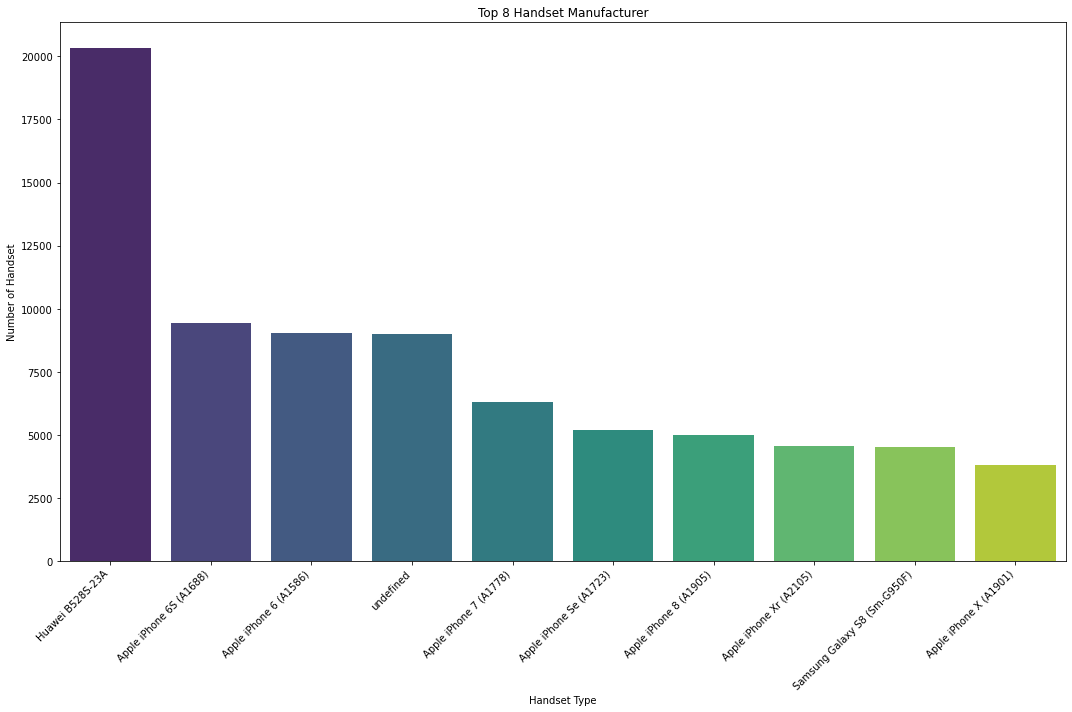

In [21]:
plt.figure(figsize=(15,10))
sns.barplot(x=top_10_handsets.index,y=top_10_handsets.values,palette='viridis')
plt.xlabel('Handset Type')
plt.ylabel('Number of Handset')
plt.title('Top 8 Handset Manufacturer')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

**top 5 handset manufacturers**

In [22]:
top_5_handsets=df['Handset Manufacturer'].value_counts().head(5)
print(top_5_handsets)

Apple                            60137
Samsung                          40839
Huawei                           34423
undefined                         8987
Sony Mobile Communications Ab      980
Name: Handset Manufacturer, dtype: int64


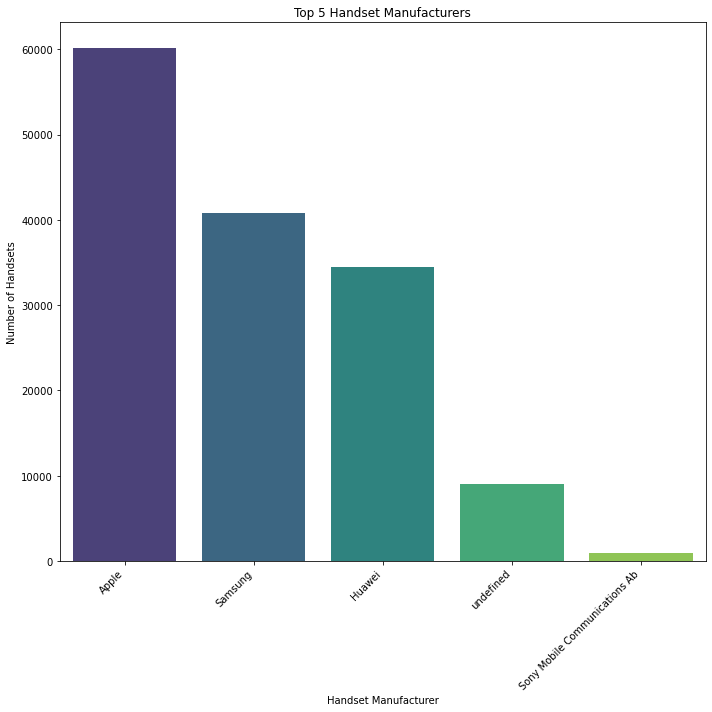

In [24]:
plt.figure(figsize=(10,10))
sns.barplot(x=top_5_handsets.index,y=top_5_handsets.values,palette='viridis')
plt.xlabel('Handset Manufacturer')
plt.ylabel('Number of Handsets')
plt.title('Top 5 Handset Manufacturers')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

**Top 5 handsets per top 3 handset manufacturer**

In [23]:
# Group by Handset Manufacturer and then find the top 5 handsets for each manufacturer
top_5_handsets_per_manufacturer = df.groupby('Handset Manufacturer')['Handset Type'].value_counts().groupby(level=0).head(5)

# Filter for the top 3 handset manufacturers
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3).index.tolist()
top_5_handsets_top_3_manufacturers = top_5_handsets_per_manufacturer[top_5_handsets_per_manufacturer.index.get_level_values('Handset Manufacturer').isin(top_3_manufacturers)]

print(top_5_handsets_top_3_manufacturers)

Handset Manufacturer  Handset Type                  
Apple                 Apple iPhone 6S (A1688)            9419
                      Apple iPhone 6 (A1586)             9023
                      Apple iPhone 7 (A1778)             6326
                      Apple iPhone Se (A1723)            5187
                      Apple iPhone 8 (A1905)             4993
Huawei                Huawei B528S-23A                  19752
                      Huawei E5180                       2079
                      Huawei P20 Lite Huawei Nova 3E     2021
                      Huawei P20                         1480
                      Huawei Y6 2018                      997
Samsung               Samsung Galaxy S8 (Sm-G950F)       4520
                      Samsung Galaxy A5 Sm-A520F         3724
                      Samsung Galaxy J5 (Sm-J530)        3696
                      Samsung Galaxy J3 (Sm-J330)        3484
                      Samsung Galaxy S7 (Sm-G930X)       3199
Name: Handset Typ

**Top 5 handsets per top 3 Manufacturers in bar plot**

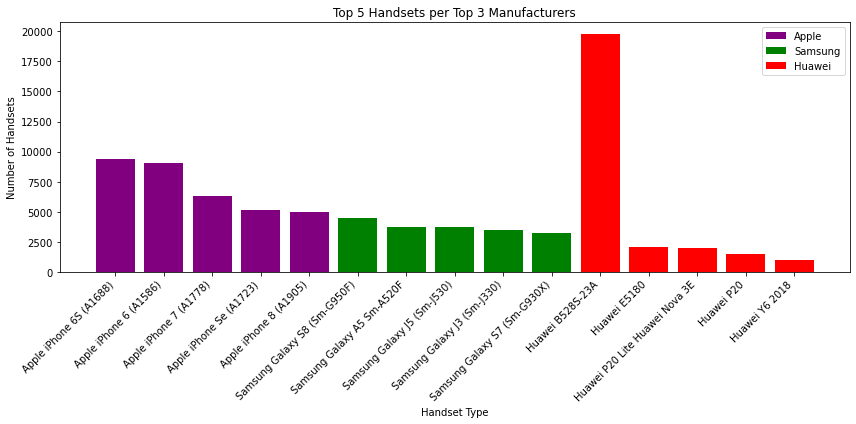

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))

# Define a color palette for the different manufacturers
colors = ['purple', 'green', 'red']

# Iterate through the top 3 manufacturers and create bars for their top 5 handsets
for i, manufacturer in enumerate(top_3_manufacturers):
  manufacturer_data = top_5_handsets_top_3_manufacturers[manufacturer]
  ax.bar(manufacturer_data.index, manufacturer_data.values, color=colors[i], label=manufacturer)

ax.set_xlabel('Handset Type')
ax.set_ylabel('Number of Handsets')
ax.set_title('Top 5 Handsets per Top 3 Manufacturers')
ax.legend()

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [25]:
df['Handset Manufacturer'].value_counts()

Apple                                 60137
Samsung                               40839
Huawei                                34423
undefined                              8987
Sony Mobile Communications Ab           980
                                      ...  
Sintave Technology (Group) Co Ltd         1
Tianlong International (Hk) Co Ltd        1
Ovvi-Cellphone Tech. Inc.                 1
Tianyu                                    1
Lephone                                   1
Name: Handset Manufacturer, Length: 170, dtype: int64

**Task 1.1- Your employer wants to have an overview of the users’ behavior on those  applications.
● Aggregate per user the following information in the column
 ○ numberof xDRsessions
 ○ Session duration
 ○ the total download (DL) and upload (UL) data
 ○ thetotal data volume (in Bytes) during this session for each application**

**Numberof xDRsessions per user based on MSISDN/Number and sort them on Descending order**

In [26]:
xDR_sessions_per_user = df.groupby('MSISDN/Number')['Dur. (ms)'].count().reset_index(name='Number of xDR Sessions')

# Sort the results in descending order of the number of xDR sessions
xDR_sessions_per_user = xDR_sessions_per_user.sort_values('Number of xDR Sessions', ascending=False).head(10)

print(xDR_sessions_per_user)

        MSISDN/Number  Number of xDR Sessions
106853   4.188282e+10                    1066
13526    3.362632e+10                      18
13180    3.362578e+10                      17
6437     3.361489e+10                      17
37052    3.365973e+10                      16
76363    3.367588e+10                      15
92923    3.376054e+10                      15
65118    3.366716e+10                      13
1279     3.360452e+10                      12
13994    3.362708e+10                      12


**Total Session Duration based on MSISDN/Number and sort them in Descending Order**

In [27]:
session_duration_per_user = df.groupby('MSISDN/Number')['Dur. (ms)'].sum().reset_index(name='Total Session Duration').sort_values('Total Session Duration',ascending=False)

# Print the results
print(session_duration_per_user)

        MSISDN/Number  Total Session Duration
106853   4.188282e+10            7.255100e+07
13180    3.362578e+10            1.855375e+07
6437     3.361489e+10            9.966898e+06
92923    3.376054e+10            9.279434e+06
13526    3.362632e+10            8.791927e+06
...               ...                     ...
24741    3.365043e+10            7.267000e+03
85146    3.369839e+10            7.258000e+03
35287    3.365933e+10            7.189000e+03
60767    3.366566e+10            7.146000e+03
99736    3.376351e+10            7.142000e+03

[106857 rows x 2 columns]


**Thetotal download (DL) and upload (UL) data per user and sort them in descending order Based on BearerID**

**Thetotal download (DL) and upload (UL) data per user and sort them in descending order Based on MSISDN/Number**

In [28]:


# Calculate total download and upload data per user
total_dl_ul_per_user = df.groupby('MSISDN/Number').agg({
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()

# Rename columns for clarity
total_dl_ul_per_user = total_dl_ul_per_user.rename(columns={'Total DL (Bytes)': 'Total DL','Total UL (Bytes)': 'Total UL'})

# Sort the results in descending order of total download data
total_dl_ul_per_user = total_dl_ul_per_user.sort_values(['Total DL', 'Total UL'], ascending=[False, False])

print(total_dl_ul_per_user)

        MSISDN/Number      Total DL      Total UL
106853   4.188282e+10  4.873783e+11  4.436642e+10
6437     3.361489e+10  8.156743e+09  6.894830e+08
92923    3.376054e+10  7.811295e+09  7.034786e+08
13180    3.362578e+10  7.770043e+09  7.295774e+08
76363    3.367588e+10  7.309542e+09  5.815688e+08
...               ...           ...           ...
63657    3.366668e+10  9.455608e+06  2.454402e+07
93033    3.376058e+10  9.275626e+06  4.519985e+07
32741    3.365880e+10  9.199518e+06  4.059600e+07
34696    3.365920e+10  9.046209e+06  2.420280e+07
101083   3.376742e+10  8.827082e+06  4.868476e+07

[106857 rows x 3 columns]


**The total Data Volume (DL+UL) per user and sort them in descending order Based on MSISDN/Number**

In [29]:
# Calculate total data volume (download + upload) for each Bearer Id
total_data_volume_per_bearer = df.groupby('MSISDN/Number').agg({
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()

# Calculate total data volume (DL + UL)
total_data_volume_per_bearer['Total Data Volume'] = total_data_volume_per_bearer['Total DL (Bytes)'] + total_data_volume_per_bearer['Total UL (Bytes)']

# Select only Bearer Id and total data volume
total_data_volume_per_bearer = total_data_volume_per_bearer[['MSISDN/Number', 'Total Data Volume']].sort_values('Total Data Volume',ascending=False)

print(total_data_volume_per_bearer)

        MSISDN/Number  Total Data Volume
106853   4.188282e+10       5.317447e+11
6437     3.361489e+10       8.846226e+09
92923    3.376054e+10       8.514774e+09
13180    3.362578e+10       8.499621e+09
13526    3.362632e+10       7.971167e+09
...               ...                ...
76161    3.367548e+10       3.802236e+07
104769   3.378251e+10       3.792924e+07
63657    3.366668e+10       3.399962e+07
43677    3.366132e+10       3.357584e+07
34696    3.365920e+10       3.324901e+07

[106857 rows x 2 columns]


**Plotting the top 5 Bearer Id and their Data Volume consumption**

**Plot the tope 5 MSISDN/Number  Id and their Data Volume consumption**

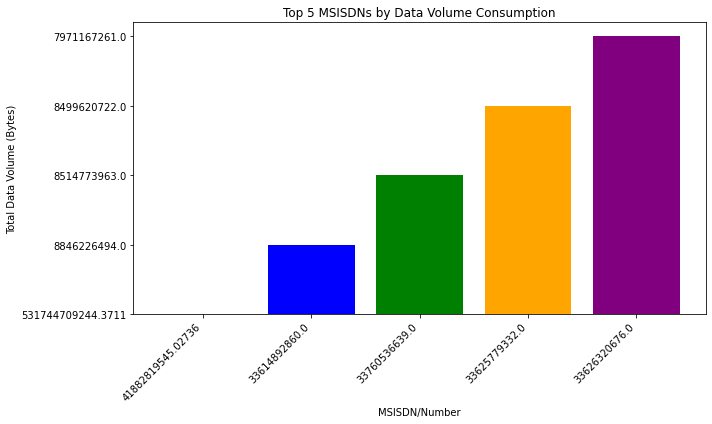

In [30]:


# Calculate total data volume (download + upload) for each MSISDN/Number
total_data_volume_per_msisdn = df.groupby('MSISDN/Number').agg({
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()

# Calculate total data volume (DL + UL)
total_data_volume_per_msisdn['Total Data Volume'] = total_data_volume_per_msisdn['Total DL (Bytes)'] + total_data_volume_per_msisdn['Total UL (Bytes)']

# Sort by Total Data Volume in descending order and get the top 5
top_5_msisdns = total_data_volume_per_msisdn.sort_values('Total Data Volume', ascending=False).head(5).astype(str)


# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_5_msisdns['MSISDN/Number'], top_5_msisdns['Total Data Volume'], color=['red', 'blue', 'green', 'orange', 'purple'])
plt.xlabel('MSISDN/Number')
plt.ylabel('Total Data Volume (Bytes)')
plt.title('Top 5 MSISDNs by Data Volume Consumption')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

**Scatter Plot between Social Media APP with its DL and UL**

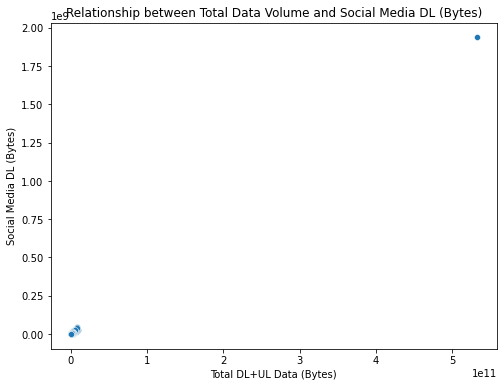

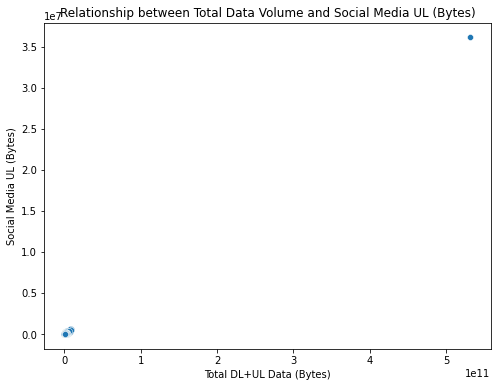

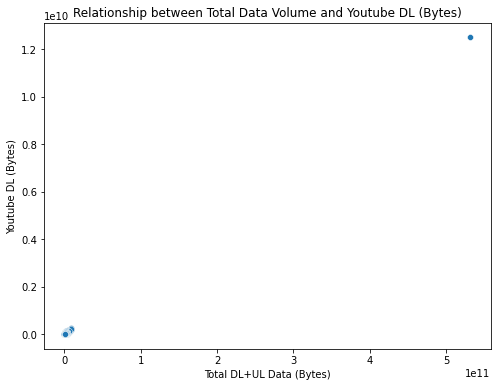

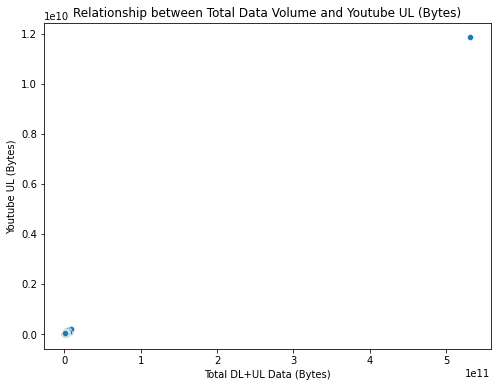

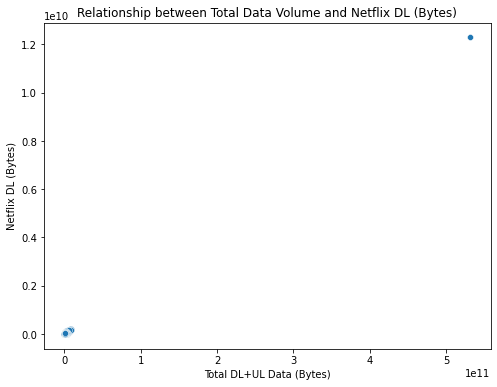

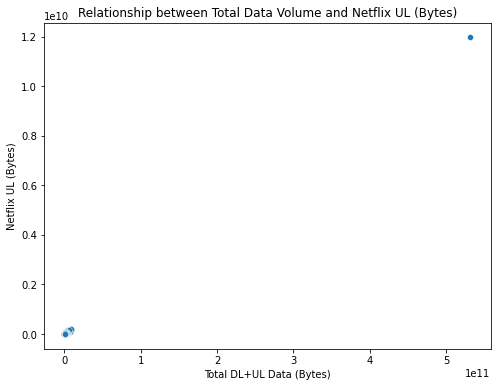

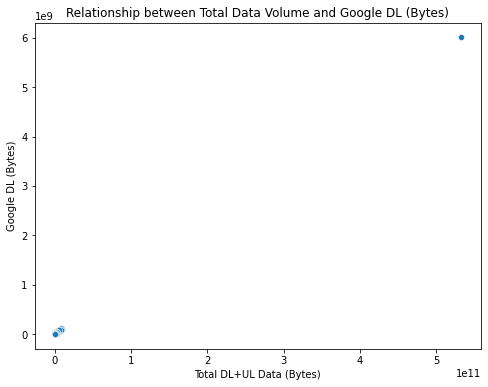

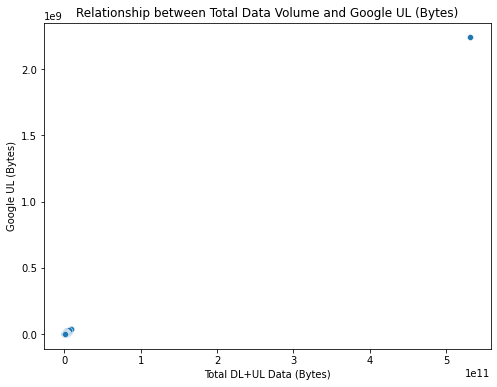

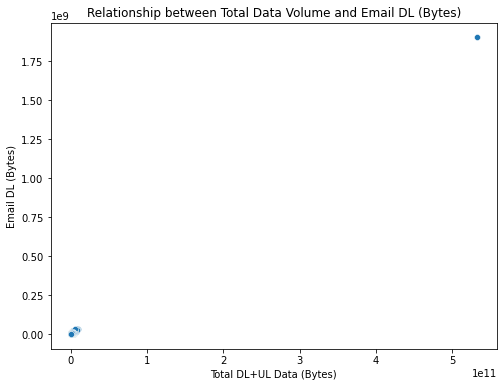

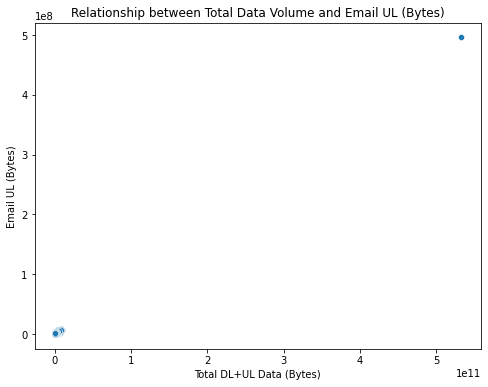

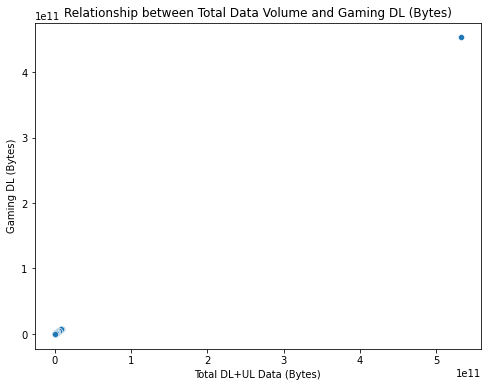

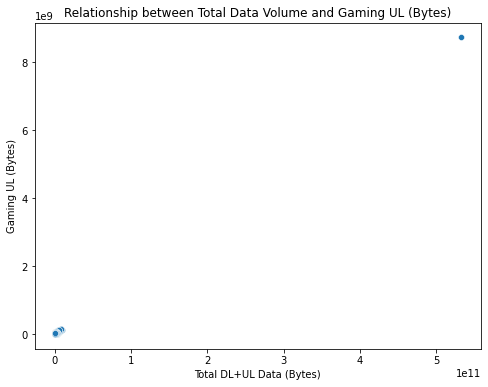

Correlation Matrix for Gaming UL (Bytes):
                   Total Data Volume  Gaming UL (Bytes)
Total Data Volume           1.000000           0.965934
Gaming UL (Bytes)           0.965934           1.000000



In [31]:
# Create a new DataFrame with total DL+UL data per MSISDN/Number
total_dl_ul_per_user = df.groupby('MSISDN/Number').agg({
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()
total_dl_ul_per_user['Total Data Volume'] = total_dl_ul_per_user['Total DL (Bytes)'] + total_dl_ul_per_user['Total UL (Bytes)']

# Create a scatter plot for each application against total DL+UL data
application_columns = [
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Youtube DL (Bytes)',
    'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
    'Email UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)'
]

for app_col in application_columns:
    # Aggregate application data per Bearer Id
    app_data_per_user = df.groupby('MSISDN/Number')[app_col].sum().reset_index()

    # Merge with total DL+UL data
    merged_df = pd.merge(total_dl_ul_per_user, app_data_per_user, on='MSISDN/Number')


    # Create scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Total Data Volume', y=app_col, data=merged_df)
    plt.xlabel('Total DL+UL Data (Bytes)')
    plt.ylabel(app_col)
    plt.title(f'Relationship between Total Data Volume and {app_col}')
    plt.show()


# Calculate and print the correlation matrix
correlation_matrix = merged_df[['Total Data Volume', app_col]].corr()
print(f"Correlation Matrix for {app_col}:\n{correlation_matrix}\n")

**The total data volume (in Bytes) during this session for**
**each application (Social Media, Google, Email, YouTube, Netflix, Gaming), highlight the top 5 msisdn in each catergoty**


In [32]:
application_data_volume = df.groupby('MSISDN/Number').agg({
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
}).reset_index()

# Calculate total data volume for each application (DL + UL)
application_data_volume['Social Media Total'] = application_data_volume['Social Media DL (Bytes)'] + application_data_volume['Social Media UL (Bytes)']
application_data_volume['Youtube Total'] = application_data_volume['Youtube DL (Bytes)'] + application_data_volume['Youtube UL (Bytes)']
application_data_volume['Netflix Total'] = application_data_volume['Netflix DL (Bytes)'] + application_data_volume['Netflix UL (Bytes)']
application_data_volume['Google Total'] = application_data_volume['Google DL (Bytes)'] + application_data_volume['Google UL (Bytes)']
application_data_volume['Email Total'] = application_data_volume['Email DL (Bytes)'] + application_data_volume['Email UL (Bytes)']
application_data_volume['Gaming Total'] = application_data_volume['Gaming DL (Bytes)'] + application_data_volume['Gaming UL (Bytes)']


# Define a function to get top 5 MSISDNs for a specific application
def get_top_5_msisdn(app_column):
  top_5 = application_data_volume.sort_values(app_column, ascending=False).head(5)
  return top_5

# Calculate top 5 MSISDNs for each application and print the results
print("Top 5 MSISDNs for Social Media:")
print(get_top_5_msisdn('Social Media Total'))

print("\nTop 5 MSISDNs for Youtube:")
print(get_top_5_msisdn('Youtube Total'))

print("\nTop 5 MSISDNs for Netflix:")
print(get_top_5_msisdn('Netflix Total'))

print("\nTop 5 MSISDNs for Google:")
print(get_top_5_msisdn('Google Total'))

print("\nTop 5 MSISDNs for Email:")
print(get_top_5_msisdn('Email Total'))

print("\nTop 5 MSISDNs for Gaming:")
print(get_top_5_msisdn('Gaming Total'))

Top 5 MSISDNs for Social Media:
        MSISDN/Number  Social Media DL (Bytes)  Social Media UL (Bytes)  \
106853   4.188282e+10             1.937715e+09             3.610230e+07   
13526    3.362632e+10             4.274384e+07             6.309420e+05   
92923    3.376054e+10             3.929765e+07             4.855430e+05   
37052    3.365973e+10             3.490044e+07             5.119140e+05   
6437     3.361489e+10             2.774974e+07             5.448000e+05   

        Youtube DL (Bytes)  Youtube UL (Bytes)  Netflix DL (Bytes)  \
106853        1.249464e+10        1.184609e+10        1.228898e+10   
13526         1.640487e+08        2.104343e+08        1.994792e+08   
92923         1.940683e+08        2.022209e+08        1.465008e+08   
37052         1.196581e+08        1.383329e+08        1.962772e+08   
6437          1.998234e+08        1.945468e+08        1.795860e+08   

        Netflix UL (Bytes)  Google DL (Bytes)  Google UL (Bytes)  \
106853        1.196459e+10  

**Non-graphical Univariate analysis- For each of the above**
**variables describing the customers, report in a table the minimum value**
**the maximum value, the average, the 1st, 2nd & 3rd quartile and provide**
**reasonable interpretations**

In [33]:
numerical_columns = ['Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)',
                    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                    'Google DL (Bytes)', 'Google UL (Bytes)',
                    'Email DL (Bytes)', 'Email UL (Bytes)',
                    'Gaming DL (Bytes)', 'Gaming UL (Bytes)']


# Create an empty list to store the results
results = []

# Iterate through each numerical column
for column in numerical_columns:
  min_value = df[column].min()
  max_value = df[column].max()
  average = df[column].mean()
  q1 = df[column].quantile(0.25)
  q2 = df[column].quantile(0.50)  # Median
  q3 = df[column].quantile(0.75)

  results.append([column, min_value, max_value, average, q1, q2, q3])

# Create a Pandas DataFrame from the results
analysis_table = pd.DataFrame(results, columns=['Variable', 'Minimum', 'Maximum', 'Average', '1st Quartile', '2nd Quartile (Median)', '3rd Quartile'])

# Display the table
analysis_table


,Variable,Minimum,Maximum,Average,1st Quartile,2nd Quartile (Median),3rd Quartile
0,Dur. (ms),7142.0,1859336.0,1.046086e+05,57442.0,86399.0,132430.0
1,Total DL (Bytes),7114041.0,902969616.0,4.546434e+08,243107173.0,455840911.0,665705138.0
2,Total UL (Bytes),2866892.0,78331311.0,4.112121e+07,33222029.0,41143242.0,49034238.0
3,Social Media DL (Bytes),12.0,3586064.0,1.795322e+06,899148.0,1794369.0,2694938.0
4,Social Media UL (Bytes),0.0,65870.0,3.292843e+04,16448.0,32920.0,49334.0
5,Youtube DL (Bytes),53.0,23259098.0,1.163407e+07,5833501.0,11616019.0,17448518.0
6,Youtube UL (Bytes),105.0,22011962.0,1.100941e+07,5517965.0,11013447.0,16515562.0
7,Netflix DL (Bytes),42.0,23259189.0,1.162685e+07,5777156.0,11642217.0,17470478.0
8,Netflix UL (Bytes),35.0,22011955.0,1.100175e+07,5475981.0,10996384.0,16507268.0
9,Google DL (Bytes),207.0,11462832.0,5.750753e+06,2882393.0,5765829.0,8623552.0



**Interpretation**


**"Dur. (ms)" (Session duration): The median session duration is [86399], with a significant range from [7142] to [1859336] milliseconds**

**"Total DL (Bytes)" (Total Download data): The average download data is [4.546434] bytes, with a large variation seen from [7114041] to [902969616] bytes**

**"Total UL (Bytes)" (Total Upload data): The 3rd quartile for upload data is [49034238] bytes, suggesting that 75% of the users had upload volumes below this value.**

**Bivariate Analysis– explore the relationship between  Social Media,  Google, Email, YouTube, Netflix, Gaming ,other application  Upload, Download, and total bytes & the total DL+UL**


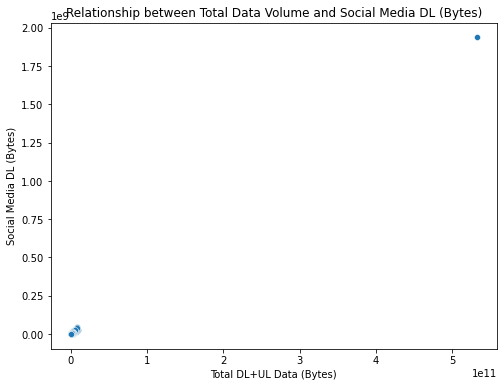

Correlation Matrix for Social Media DL (Bytes):
                         Total Data Volume  Social Media DL (Bytes)
Total Data Volume                 1.000000                 0.966427
Social Media DL (Bytes)           0.966427                 1.000000



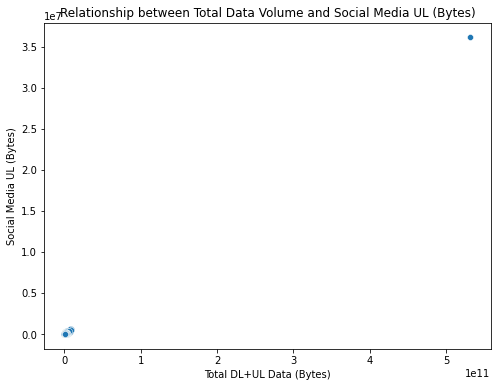

Correlation Matrix for Social Media UL (Bytes):
                         Total Data Volume  Social Media UL (Bytes)
Total Data Volume                 1.000000                 0.966856
Social Media UL (Bytes)           0.966856                 1.000000



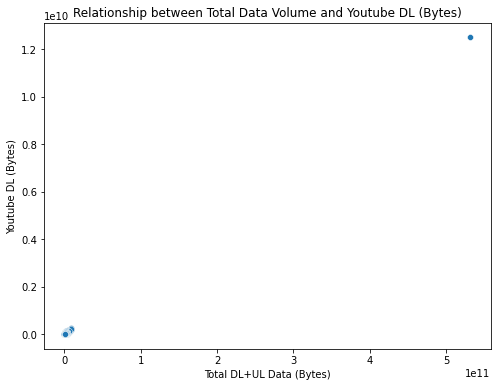

Correlation Matrix for Youtube DL (Bytes):
                    Total Data Volume  Youtube DL (Bytes)
Total Data Volume            1.000000            0.966811
Youtube DL (Bytes)           0.966811            1.000000



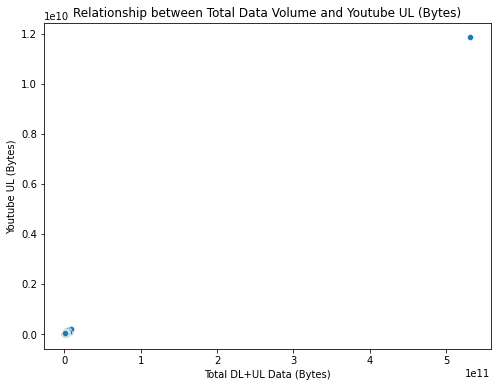

Correlation Matrix for Youtube UL (Bytes):
                    Total Data Volume  Youtube UL (Bytes)
Total Data Volume            1.000000            0.966896
Youtube UL (Bytes)           0.966896            1.000000



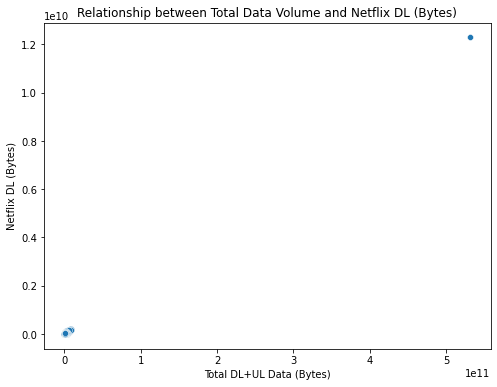

Correlation Matrix for Netflix DL (Bytes):
                    Total Data Volume  Netflix DL (Bytes)
Total Data Volume            1.000000            0.966242
Netflix DL (Bytes)           0.966242            1.000000



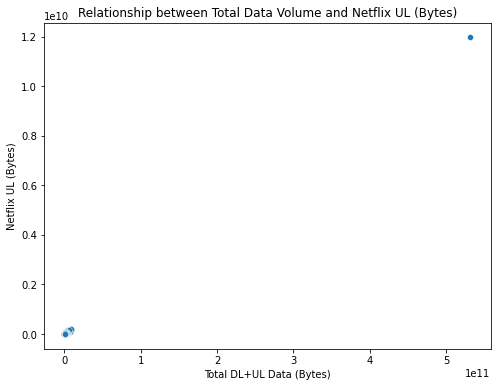

Correlation Matrix for Netflix UL (Bytes):
                    Total Data Volume  Netflix UL (Bytes)
Total Data Volume            1.000000            0.967125
Netflix UL (Bytes)           0.967125            1.000000



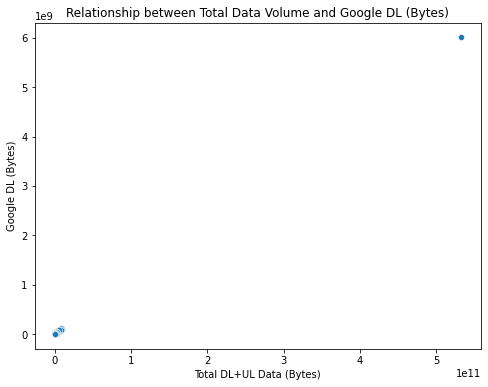

Correlation Matrix for Google DL (Bytes):
                   Total Data Volume  Google DL (Bytes)
Total Data Volume           1.000000           0.965679
Google DL (Bytes)           0.965679           1.000000



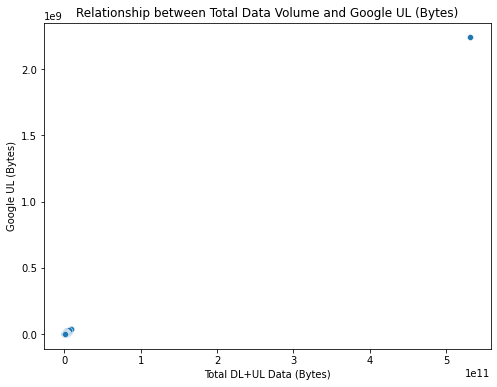

Correlation Matrix for Google UL (Bytes):
                   Total Data Volume  Google UL (Bytes)
Total Data Volume           1.000000           0.966742
Google UL (Bytes)           0.966742           1.000000



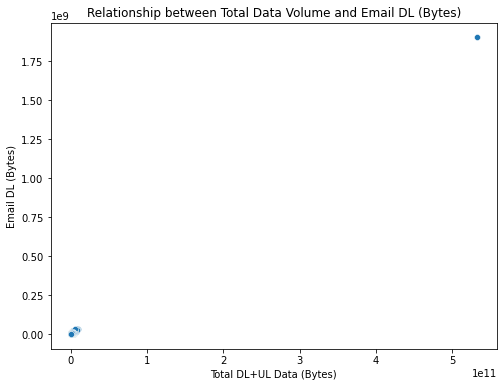

Correlation Matrix for Email DL (Bytes):
                   Total Data Volume  Email DL (Bytes)
Total Data Volume           1.000000          0.965374
Email DL (Bytes)            0.965374          1.000000



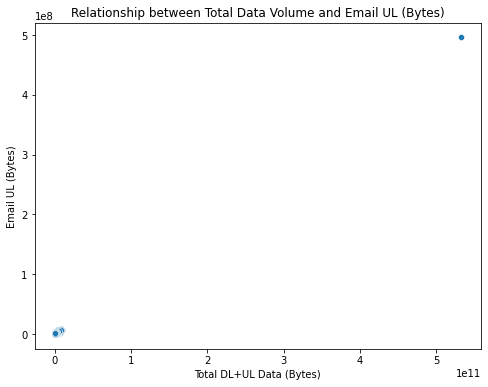

Correlation Matrix for Email UL (Bytes):
                   Total Data Volume  Email UL (Bytes)
Total Data Volume           1.000000          0.965345
Email UL (Bytes)            0.965345          1.000000



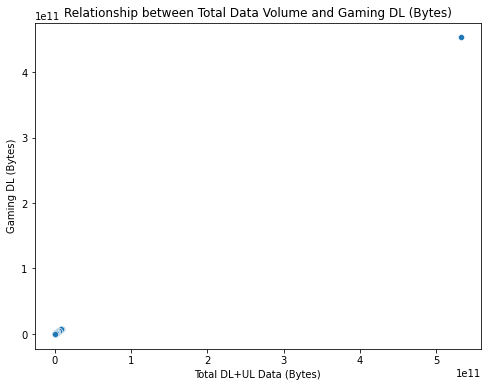

Correlation Matrix for Gaming DL (Bytes):
                   Total Data Volume  Gaming DL (Bytes)
Total Data Volume            1.00000            0.99952
Gaming DL (Bytes)            0.99952            1.00000



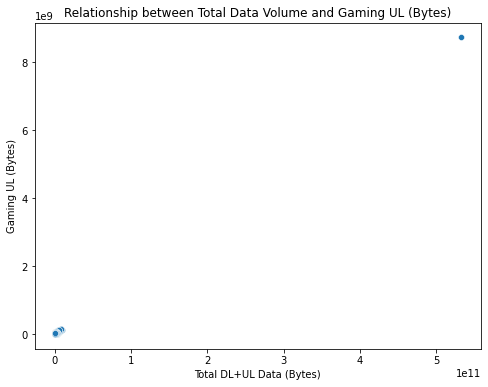

Correlation Matrix for Gaming UL (Bytes):
                   Total Data Volume  Gaming UL (Bytes)
Total Data Volume           1.000000           0.965934
Gaming UL (Bytes)           0.965934           1.000000



In [34]:


# Create a new DataFrame with total DL+UL data per MSISDN/Number
total_dl_ul_per_user = df.groupby('MSISDN/Number').agg({
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()
total_dl_ul_per_user['Total Data Volume'] = total_dl_ul_per_user['Total DL (Bytes)'] + total_dl_ul_per_user['Total UL (Bytes)']

# Create a scatter plot for each application against total DL+UL data
application_columns = [
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Youtube DL (Bytes)',
    'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
    'Email UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)'
]

for app_col in application_columns:
    # Aggregate application data per MSISDN/Number
    app_data_per_user = df.groupby('MSISDN/Number')[app_col].sum().reset_index()

    # Merge with total DL+UL data
    merged_df = pd.merge(total_dl_ul_per_user, app_data_per_user, on='MSISDN/Number')

    # Create scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Total Data Volume', y=app_col, data=merged_df)
    plt.xlabel('Total DL+UL Data (Bytes)')
    plt.ylabel(app_col)
    plt.title(f'Relationship between Total Data Volume and {app_col}')
    plt.show()


    # Calculate and print the correlation matrix
    correlation_matrix = merged_df[['Total Data Volume', app_col]].corr()
    print(f"Correlation Matrix for {app_col}:\n{correlation_matrix}\n")

**Interpretation-Most high degree of corrleation found with Game Download and Total Volume consumed**

**Plot between total duration spent and total data volume consumption for top 6 MSISDN/Number**

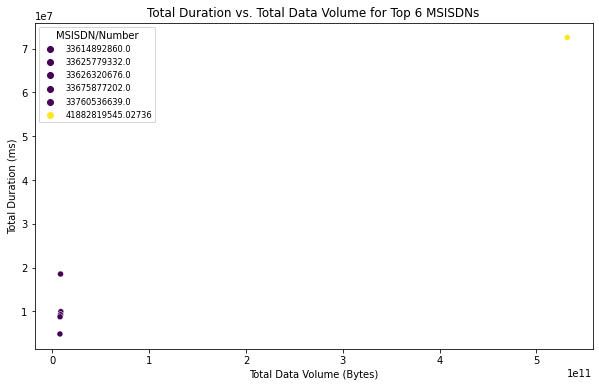

In [35]:

user_stats = df.groupby('MSISDN/Number').agg({
    'Dur. (ms)': 'sum',
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum'
}).reset_index()

# Calculate total data volume
user_stats['Total Data Volume'] = user_stats['Total DL (Bytes)'] + user_stats['Total UL (Bytes)']

# Sort by total data volume in descending order and get the top 6
top_6_users = user_stats.sort_values('Total Data Volume', ascending=False).head(6)

# Create a scatter plot with hue for MSISDN/Number
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Data Volume', y='Dur. (ms)', hue='MSISDN/Number', data=top_6_users, palette='viridis')
plt.xlabel('Total Data Volume (Bytes)')
plt.ylabel('Total Duration (ms)')
plt.title('Total Duration vs. Total Data Volume for Top 6 MSISDNs')
plt.legend(title='MSISDN/Number', loc='best', fontsize='small')
plt.show()

**Variable transformations– segment the users into the top five decile classes
based on the total duration for all sessions and compute the total data (DL+UL)
 per decile class**

In [36]:
# Assuming 'total_data_volume_per_bearer' DataFrame contains 'Bearer Id' and 'Total Data Volume'
total_data_volume_per_bearer['Decile Class'] = pd.qcut(total_data_volume_per_bearer['Total Data Volume'], 5, labels=False)

# Group by decile class and calculate the total data volume per class
total_data_per_decile = total_data_volume_per_bearer.groupby('Decile Class')['Total Data Volume'].sum().reset_index()

print(total_data_per_decile)

   Decile Class  Total Data Volume
0             0       4.034524e+12
1             1       8.798677e+12
2             2       1.318700e+13
3             3       1.731508e+13
4             4       3.102991e+13


**Dimensionality Reduction– perform a principal component analysis to reduce the dimensions of your data to 15 PCA components and provide a useful interpretation of the results**

In [40]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select numerical features for PCA
numerical_features = df.select_dtypes(include=np.number)

# Standardize the data
x = StandardScaler().fit_transform(numerical_features)

# Apply PCA with 15 components
pca = PCA(n_components=15)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)
print("Total Explained Variance:", np.sum(explained_variance_ratio))

# Loadings (contribution of each original feature to each principal component)
loadings = pd.DataFrame(pca.components_.T, index=numerical_features.columns, columns=[f'PC{i+1}' for i in range(15)])
print("Loadings:\n", loadings)



Explained Variance Ratio: [0.15338629 0.06019786 0.05020951 0.04085664 0.040674   0.03567586
 0.03438065 0.03226303 0.02961764 0.02831933 0.02316017 0.02280741
 0.02068745 0.02066208 0.02060023]
Total Explained Variance: 0.6134981529971537
Loadings:
                                                PC1       PC2       PC3  \
Start ms                                  0.000059 -0.000713  0.002766   
End ms                                    0.000620 -0.001608 -0.001463   
Dur. (ms)                                -0.056359  0.088114  0.438078   
IMSI                                      0.000429 -0.003153 -0.017448   
MSISDN/Number                            -0.000796  0.003426  0.021329   
IMEI                                      0.179311 -0.068815  0.032678   
Avg RTT DL (ms)                           0.001707 -0.003895 -0.023082   
Avg RTT UL (ms)                           0.041890  0.023083  0.018166   
Avg Bearer TP DL (kbps)                   0.217811 -0.118113 -0.218011   
Avg Beare

**Interpretation**

**More than 60 percent variation explained by 15 PCA Components**

**PC1 has high positive loadings on "Total DL (Bytes)" and "Total UL (Bytes)", it might represent the overall data usage of the user**.

**PC2 has high positive loadings on "Social Media DL (Bytes)" and "Social Media UL (Bytes)", it might represent the social media usage of the user.**

**Correlation Analysis– compute a correlation matrix for the following variables
 and interpret your findings: Social Media data, Google data, Email data, YouTube  data, Netflix data, Gaming data, and Other data**

                         Social Media DL (Bytes)  Social Media UL (Bytes)  \
Social Media DL (Bytes)                 1.000000                -0.000555   
Social Media UL (Bytes)                -0.000555                 1.000000   
Google DL (Bytes)                      -0.001954                 0.003542   
Google UL (Bytes)                       0.000186                 0.001085   
Email DL (Bytes)                        0.004745                 0.004823   
Email UL (Bytes)                       -0.002518                -0.001427   
Youtube DL (Bytes)                     -0.001389                -0.001786   
Youtube UL (Bytes)                      0.002345                -0.002368   
Netflix DL (Bytes)                     -0.001817                -0.000772   
Netflix UL (Bytes)                      0.003457                -0.002493   
Gaming DL (Bytes)                       0.001018                 0.000210   
Gaming UL (Bytes)                       0.003095                 0.000844   

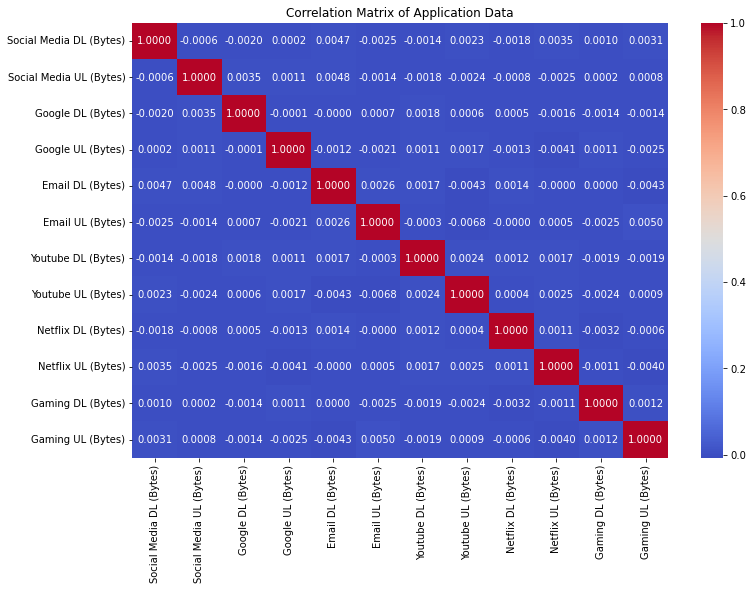

In [37]:
# Select the relevant columns for correlation analysis
data_columns = ['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                'Google DL (Bytes)', 'Google UL (Bytes)',
                'Email DL (Bytes)', 'Email UL (Bytes)',
                'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
                'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
                'Gaming DL (Bytes)', 'Gaming UL (Bytes)']

# Create a correlation matrix for these columns
correlation_matrix = df[data_columns].corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Correlation Matrix of Application Data')
plt.show()

**Part-2** **User Engagement Analysis** 

**Session Frequency Based on  MSISDN/Number**

In [38]:
# Assuming 'df' is your DataFrame and 'MSISDN/Number' is the column representing user sessions
sessions_frequency = df.groupby('MSISDN/Number')['MSISDN/Number'].count().sort_values(ascending=False)

sessions_frequency

MSISDN/Number
4.188282e+10    1066
3.362632e+10      18
3.362578e+10      17
3.361489e+10      17
3.365973e+10      16
                ... 
3.366068e+10       1
3.366068e+10       1
3.366067e+10       1
3.366067e+10       1
8.823971e+14       1
Name: MSISDN/Number, Length: 106857, dtype: int64

**Duration of Session**

In [40]:
# Assuming 'df' is your DataFrame and it has 'Start' and 'End' columns representing session start and end times.

# Convert 'Start' and 'End' columns to datetime objects if they are not already
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

# Calculate the duration of each session
df['Session Duration'] = df['End'] - df['Start']

# Print the DataFrame with the calculated session duration
duration=df.groupby('MSISDN/Number')['Session Duration'].value_counts().groupby(level=0).head(20)
duration


MSISDN/Number  Session Duration
3.360100e+10   1 days 08:25:20     1
               2 days 02:20:31     1
               1 days 13:29:29     1
3.360101e+10   0 days 13:51:18     1
               0 days 05:09:09     1
                                  ..
4.188282e+10   0 days 23:59:21     2
               0 days 23:59:38     2
3.197021e+12   10 days 03:43:05    1
3.370000e+14   2 days 22:17:11     1
8.823971e+14   10 days 01:37:24    1
Name: Session Duration, Length: 140079, dtype: int64

**thesession total traffic (download and upload (bytes))**

In [45]:
# Assuming 'df' is your DataFrame and it has 'Total DL (Bytes)' and 'Total UL (Bytes)' columns.
total_traffic = df['Total DL (Bytes)'].sum() + df['Total UL (Bytes)'].sum()

print(f"The total traffic (download and upload) is: {total_traffic} bytes")

The total traffic (download and upload) is: 74365191220297.38 bytes


 Task 2.1- Based on the above submit the Python script and slide:
 
 ● Aggregate the above metrics per customer ID (MSISDN) and report the top 10
 customers per engagement metric
 
 ● Normalize each engagement metric and run a k-means (k=3) to classify customers into
 three groups of engagement.
 
 ● Compute the minimum, maximum, average & total non-normalized metrics for each
 cluster. Interpret your results visually with accompanying text explaining your findings.
 
 ● Aggregate user total traffic per application and derive the top 10 most engaged users per
 application
 
 ● Plot the top 3 most used applications using appropriate charts.
 
 ● Using the k-means clustering algorithm, group users in k engagement clusters based on
 the engagement metrics:
 
 ○ What isthe optimized value of k (use the elbow method for this)?
 
 ○ Interpret your findings.
 


**Aggregate the above metrics per customer ID (MSISDN) and report the top 10 customers per engagement metric**


In [41]:
# Assuming  DataFrame is named 'df' and 'Bearer Id' represents the customer ID (MSISDN)

# Aggregate metrics per customer ID
customer_engagement = df.groupby('MSISDN/Number').agg({
    'Dur. (ms)': 'sum',  # Total session duration
    'Total DL (Bytes)': 'sum',  # Total download data
    'Total UL (Bytes)': 'sum',  # Total upload data
    'Bearer Id': 'count'  # Number of sessions
}).rename(columns={'Dur. (ms)': 'Total Session Duration', 'Bearer Id': 'Number of Sessions'})

# Report the top 10 customers per engagement metric
top_10_duration = customer_engagement.nlargest(10, 'Total Session Duration')
top_10_download = customer_engagement.nlargest(10, 'Total DL (Bytes)')
top_10_upload = customer_engagement.nlargest(10, 'Total UL (Bytes)')
top_10_sessions = customer_engagement.nlargest(10, 'Number of Sessions')

print("Top 10 Customers by Total Session Duration:\n", top_10_duration)
print("\nTop 10 Customers by Total Download Data:\n", top_10_download)
print("\nTop 10 Customers by Total Upload Data:\n", top_10_upload)
print("\nTop 10 Customers by Number of Sessions:\n", top_10_sessions)

Top 10 Customers by Total Session Duration:
                Total Session Duration  Total DL (Bytes)  Total UL (Bytes)  \
MSISDN/Number                                                               
4.188282e+10             7.255100e+07      4.873783e+11      4.436642e+10   
3.362578e+10             1.855375e+07      7.770043e+09      7.295774e+08   
3.361489e+10             9.966898e+06      8.156743e+09      6.894830e+08   
3.376054e+10             9.279434e+06      7.811295e+09      7.034786e+08   
3.362632e+10             8.791927e+06      7.301517e+09      6.696507e+08   
3.366716e+10             8.744914e+06      5.052068e+09      5.663264e+08   
3.366284e+10             6.614270e+06      3.593674e+09      4.064244e+08   
3.366469e+10             6.288730e+06      5.279827e+09      4.021808e+08   
3.360313e+10             6.287761e+06      4.540607e+09      4.355876e+08   
3.366746e+10             5.649882e+06      2.334299e+09      2.662226e+08   

               Number of Sessi

**Interpretation**
- Number of session by the top three MSISDN/Number are 1066,18,17 respectively
- Top 3 session Duration for the MSISDN Number are 
- Total Data Down Load and upload by the top 3 MSISDN/Number are respectively

**Normalize each engagement metric and run a k-means (k=3) to classify customers into three groups of engagement**

Cluster Statistics:
         Total Session Duration                                            \
                           min           max          mean           sum   
Cluster                                                                    
0                 7.142000e+03  4.159900e+05  1.130874e+05  1.105147e+10   
1                 7.255100e+07  7.255100e+07  7.255100e+07  7.255100e+07   
2                 1.168000e+05  1.855375e+07  5.002051e+05  4.567373e+09   

        Total DL (Bytes)                                            \
                     min           max          mean           sum   
Cluster                                                              
0           8.827082e+06  2.967057e+09  5.537209e+08  5.411237e+13   
1           4.873783e+11  4.873783e+11  4.873783e+11  4.873783e+11   
2           1.904514e+07  8.156743e+09  1.489127e+09  1.359722e+13   

        Total UL (Bytes)                                            \
                     min       

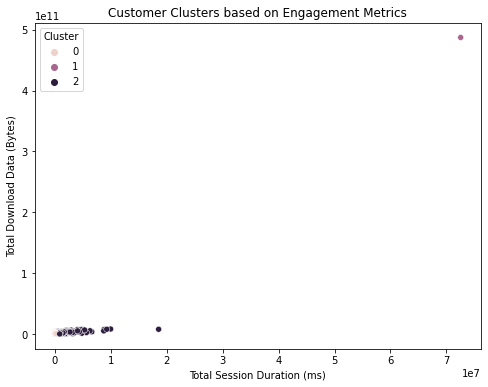

In [42]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Assuming 'customer_engagement' DataFrame contains aggregated metrics per customer
engagement_metrics = customer_engagement[['Total Session Duration', 'Total DL (Bytes)', 'Total UL (Bytes)', 'Number of Sessions']]

# Normalize engagement metrics
scaler = MinMaxScaler()
normalized_engagement = scaler.fit_transform(engagement_metrics)

# K-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(normalized_engagement)

# Add cluster labels to the DataFrame
customer_engagement['Cluster'] = clusters

# Compute statistics for each cluster
cluster_stats = customer_engagement.groupby('Cluster').agg({
    'Total Session Duration': ['min', 'max', 'mean', 'sum'],
    'Total DL (Bytes)': ['min', 'max', 'mean', 'sum'],
    'Total UL (Bytes)': ['min', 'max', 'mean', 'sum'],
    'Number of Sessions': ['min', 'max', 'mean', 'sum']
})

print("Cluster Statistics:\n", cluster_stats)

# Visualize the clusters (e.g., using scatter plots)
# ... (You can use Seaborn or Matplotlib for this)

# For example, a scatter plot of Total Session Duration vs. Total Data Volume:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total Session Duration', y='Total DL (Bytes)', hue='Cluster', data=customer_engagement)
plt.xlabel('Total Session Duration (ms)')
plt.ylabel('Total Download Data (Bytes)')
plt.title('Customer Clusters based on Engagement Metrics')
plt.show()

# Interpret the results visually and with accompanying text:
# ... (Analyze the cluster statistics and visualizations to understand the characteristics of each cluster)
# For example, Cluster 0 might represent high-engagement users with long sessions and high data volume,
# while Cluster 1 might represent medium-engagement users, and Cluster 2 might represent low-engagement users.

**Compute the minimum, maximum, average & total non-normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings**

Cluster Statistics:
         Total Session Duration                                            \
                           min           max          mean           sum   
Cluster                                                                    
0                 7.142000e+03  4.159900e+05  1.130874e+05  1.105147e+10   
1                 7.255100e+07  7.255100e+07  7.255100e+07  7.255100e+07   
2                 1.168000e+05  1.855375e+07  5.002051e+05  4.567373e+09   

        Total DL (Bytes)                                            \
                     min           max          mean           sum   
Cluster                                                              
0           8.827082e+06  2.967057e+09  5.537209e+08  5.411237e+13   
1           4.873783e+11  4.873783e+11  4.873783e+11  4.873783e+11   
2           1.904514e+07  8.156743e+09  1.489127e+09  1.359722e+13   

        Total UL (Bytes)                                            \
                     min       

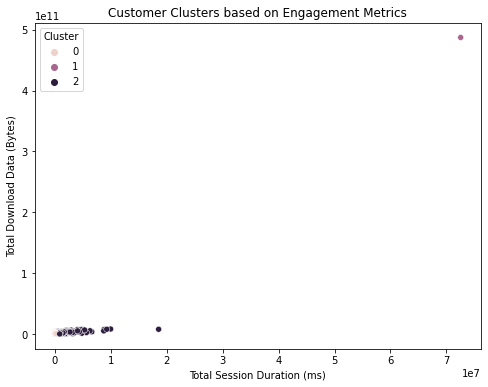

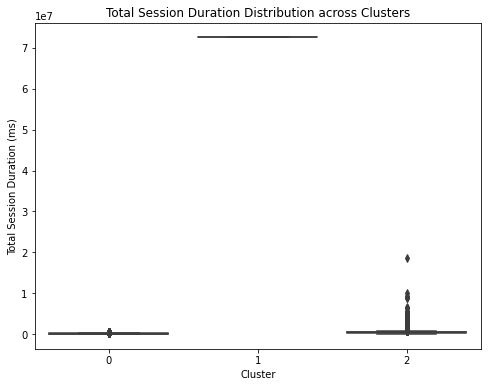

In [43]:
# Assuming 'customer_engagement' DataFrame contains aggregated metrics per customer and 'Cluster' column
# Compute statistics for each cluster
cluster_stats = customer_engagement.groupby('Cluster').agg({
    'Total Session Duration': ['min', 'max', 'mean', 'sum'],
    'Total DL (Bytes)': ['min', 'max', 'mean', 'sum'],
    'Total UL (Bytes)': ['min', 'max', 'mean', 'sum'],
    'Number of Sessions': ['min', 'max', 'mean', 'sum']
})

print("Cluster Statistics:\n", cluster_stats)

# Visualize the clusters (e.g., using scatter plots, box plots)
# ... (You can use Seaborn or Matplotlib for this)


# Example scatter plot of Total Session Duration vs. Total Data Volume:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total Session Duration', y='Total DL (Bytes)', hue='Cluster', data=customer_engagement)
plt.xlabel('Total Session Duration (ms)')
plt.ylabel('Total Download Data (Bytes)')
plt.title('Customer Clusters based on Engagement Metrics')
plt.show()


# Example box plot of Total Session Duration for each cluster:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Total Session Duration', data=customer_engagement)
plt.xlabel('Cluster')
plt.ylabel('Total Session Duration (ms)')
plt.title('Total Session Duration Distribution across Clusters')
plt.show()




**Interpretation**

**Cluster 0 appears to represent high-engagement users, characterized by significantly longer total session durations and higher total data download volumes compared to other clusters**

**Cluster 1 represents moderate engagement, showing intermediate values for session duration and data volume**

**Cluster 2 shows the lowest engagement levels with the shortest session durations and smallest total data volumes**

**We can further analyze the characteristics of each cluster by examining the other metrics like Total UL (Bytes) and Number of Sessions**

**We can also investigate the user behavior within each cluster by examining other features in your data or conducting further analysis using other statistical methods**


**Aggregate user total traffic per application and derive the top 10 most engaged users per application**

In [44]:
# Assuming your DataFrame is named 'df'

# Aggregate user total traffic per application
application_columns = [
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Youtube DL (Bytes)',
    'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)',
    'Email UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)'
]

app_traffic_per_user = df.groupby('MSISDN/Number').agg({
    app_col: 'sum' for app_col in application_columns
}).reset_index()

# Derive the top 10 most engaged users per application
for app_col in application_columns:
  top_10_users_per_app = app_traffic_per_user.nlargest(10, app_col)
  print(f"Top 10 users for {app_col}:\n{top_10_users_per_app[[ 'MSISDN/Number', app_col]]}")
  print("-" * 30)


Top 10 users for Social Media DL (Bytes):
        MSISDN/Number  Social Media DL (Bytes)
106853   4.188282e+10             1.937715e+09
13526    3.362632e+10             4.274384e+07
92923    3.376054e+10             3.929765e+07
37052    3.365973e+10             3.490044e+07
6437     3.361489e+10             2.774974e+07
13180    3.362578e+10             2.656412e+07
65118    3.366716e+10             2.375375e+07
106137   3.378632e+10             2.356866e+07
70960    3.366907e+10             2.347705e+07
666      3.360313e+10             2.277668e+07
------------------------------
Top 10 users for Social Media UL (Bytes):
        MSISDN/Number  Social Media UL (Bytes)
106853   4.188282e+10             3.610230e+07
13526    3.362632e+10             6.309420e+05
13180    3.362578e+10             5.713790e+05
76363    3.367588e+10             5.675570e+05
6437     3.361489e+10             5.448000e+05
37052    3.365973e+10             5.119140e+05
65118    3.366716e+10             4.940

**Plot the top 3 most used applications using appropriate charts. ● Using the k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics**

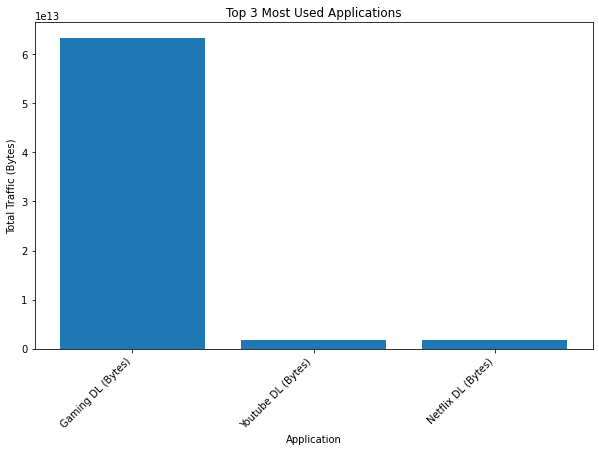

In [45]:
# Assuming 'app_traffic_per_user' DataFrame contains aggregated application traffic per user
# and 'application_columns' contains the list of application columns

# Plot the top 3 most used applications using bar charts
top_3_apps = app_traffic_per_user[application_columns].sum().nlargest(3)

plt.figure(figsize=(10, 6))
plt.bar(top_3_apps.index, top_3_apps.values)
plt.xlabel('Application')
plt.ylabel('Total Traffic (Bytes)')
plt.title('Top 3 Most Used Applications')
plt.xticks(rotation=45, ha='right')
plt.show()



**Using the k-means clustering algorithm, group users in k engagement clusters based on engagement metrics**

**What is the optimized value of k (use the elbow method for this)?**

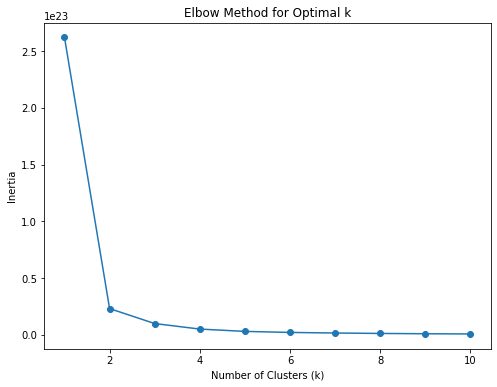

In [46]:


# Assuming 'engagement_metrics' DataFrame contains normalized engagement metrics
inertia = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(engagement_metrics)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

**Interpretation**


**For example, the elbow point might be around k=3 or k=4, indicating that 3 or 4 clusters might be a good choice for grouping users based on their engagement.**




**Interpretation**


**Core Objectives:**

The code aims to analyze user engagement patterns based on data usage, session duration, and application preferences. It employs techniques like scatter plots, correlation analysis, PCA, and k-means clustering to identify key insights.

**Key Interpretations and Findings:**

1. **Data Volume and Application Usage Correlation:**
   - The code calculates the correlation between total data volume and usage for various applications (e.g., Social Media, YouTube, Netflix).
   - **Finding:**  The correlation analysis helps identify which applications are most strongly related to higher overall data usage. For example, if YouTube data volume shows a strong positive correlation with total data volume, it suggests that users who consume more YouTube content generally have a higher overall data usage.

2. **Session Duration vs. Data Volume:**
   - Scatter plots are used to analyze the relationship between total session duration and total data volume for the top 6 users (identified by highest data volume).
   - **Finding:** The scatter plot helps reveal if there is a positive correlation between session duration and data volume, indicating that users with longer sessions generally use more data. It could also help identify outliers, where users have short sessions but very high data volume, possibly due to large file downloads.

3. **User Segmentation with Deciles:**
   - The code divides users into deciles based on their total data volume.
   - **Finding:** This categorization can reveal patterns in data consumption across different user segments. For example, users in the top decile might have very different usage behavior compared to those in the lower deciles.

4. **Principal Component Analysis (PCA):**
   - PCA is applied to reduce the dimensionality of the data and identify underlying patterns.
   - **Finding:** PCA helps create new features (principal components) that capture the most important variations in the data. By analyzing the explained variance ratio and loadings, you can gain insights into which original features contribute most to these new features. For example, PC1 might represent overall data usage, PC2 might represent social media usage, etc.

5. **Correlation Matrix of Application Data:**
   - A correlation matrix is generated to understand the relationship between different application data.
   - **Finding:** The heatmap of the correlation matrix helps reveal how usage of different applications is linked. For example, if Social Media data and YouTube data have a strong positive correlation, it suggests users who heavily use social media also tend to consume more YouTube content.

6. **Session Frequency Analysis:**
   - The code calculates the frequency of sessions for each user (Bearer ID).
   - **Finding:** This helps identify the users with the highest number of sessions, which could be considered highly active or engaged users.

7. **Total Traffic Calculation:**
   - The code calculates the total traffic (upload + download) for all users.
   - **Finding:** This provides a general overview of the network's total data usage.

8. **Customer Engagement Analysis:**
   - **Aggregation per Customer:** Metrics like session duration, data volume, and session counts are aggregated per customer (MSISDN).
   - **Top 10 Customers:**  The top 10 customers based on various engagement metrics are identified.
   - **Normalization and Clustering:** Engagement metrics are normalized, and k-means clustering (with k=3) is used to group customers into clusters based on their engagement level.
   - **Cluster Statistics and Interpretation:**  Statistics like the minimum, maximum, average, and total values are computed for each cluster.  Visualizations (e.g., scatter plots) help understand the characteristics of each cluster.
   - **Finding:**  The clusters reveal insights into user behavior. For example, one cluster might represent high-engagement users, another represents medium-engagement users, and a third represents low-engagement users.

9. **Application Usage by Users:**
   - User total traffic per application is calculated.
   - **Top 10 Users:** The top 10 most engaged users for each application are identified.
   - **Top Application Usage:** The top 3 most used applications are plotted using a bar chart.
   - **Finding:** This helps understand which applications are the most popular among users and which users are the most engaged with each application.

10. **Optimal k for K-Means Clustering:**
    - The elbow method is used to find the optimal number of clusters (k) for k-means.
    - **Finding:** The elbow point on the inertia plot suggests the optimal k value, which represents a balance between maximizing variance explained within clusters and minimizing the number of clusters.


**Overall:**

This code provides a comprehensive analysis of user engagement. It combines descriptive statistics, correlation analysis, dimensionality reduction, and clustering to understand patterns in data usage, application preference, and user activity. The analysis helps identify key characteristics of high and low engagement users, most popular applications, and the general traffic load on the network.

The insights from this analysis can be valuable for network optimization, personalized user experience enhancements, and identifying opportunities for marketing campaigns and targeted promotions.


**Task 3. 1- Aggregate, per customer, the following information (treat missing & outliers by
replacing with the mean or the mode of the corresponding variable)** :

**Average TCP retransmission

**Average RTT

**Handset type

**Average throughput

In [47]:
df['TCP Retransmission']=df['TCP DL Retrans. Vol (Bytes)']+df['TCP UL Retrans. Vol (Bytes)']
df['RTT']=df['Avg RTT UL (ms)']+df['Avg RTT DL (ms)']
df['Throughput']=df['Avg Bearer TP DL (kbps)']+df['Avg Bearer TP UL (kbps)']

In [48]:
def aggregate_customer_data(df):
  """
  Aggregates customer data, handling missing and outlier values.

  Args:
    df: DataFrame containing customer data.

  Returns:
    DataFrame with aggregated customer information.
  """

  # Replace missing values with the mean or mode
  df['TCP Retransmission'].fillna(df['TCP Retransmission'].mean(), inplace=True)
  df['RTT'].fillna(df['RTT'].mean(), inplace=True)
  df['Handset Type'].fillna(df['Handset Type'].mode()[0], inplace=True)
  df['Throughput'].fillna(df['Throughput'].mean(), inplace=True)

  # Replace outliers with the mean
  for column in ['TCP Retransmission', 'RTT', 'Throughput']:
      q1 = df[column].quantile(0.25)
      q3 = df[column].quantile(0.75)
      iqr = q3 - q1
      lower_bound = q1 - 1.5 * iqr
      upper_bound = q3 + 1.5 * iqr
      df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound),
                            df[column].mean(), df[column])

  # Aggregate per customer
  aggregated_df = df.groupby('MSISDN/Number').agg({
      'TCP Retransmission': 'mean',
      'RTT': 'mean',
      'Handset Type': lambda x: x.mode()[0],  # Mode for Handset Type
      'Throughput': 'mean'
  }).reset_index()

  return aggregated_df



# Example usage (assuming 'df' is your DataFrame):
aggregated_customer_df = aggregate_customer_data(df)
print(aggregated_customer_df)

        MSISDN/Number  TCP Retransmission         RTT  \
0        3.360100e+10        2.156957e+07   46.000000   
1        3.360100e+10        2.156957e+07   31.000000   
2        3.360100e+10        2.156957e+07  127.458589   
3        3.360101e+10        7.607247e+05   84.000000   
4        3.360101e+10        1.547020e+07   59.500000   
...               ...                 ...         ...   
106852   3.379000e+10        2.156957e+07   40.000000   
106853   4.188282e+10        9.050298e+06  102.003434   
106854   3.197021e+12        2.156957e+07  127.458589   
106855   3.370000e+14        2.156957e+07  127.458589   
106856   8.823971e+14        2.156957e+07  127.458589   

                            Handset Type    Throughput  
0         Huawei P20 Lite Huawei Nova 3E     76.000000  
1                 Apple iPhone 7 (A1778)     99.000000  
2                              undefined     97.000000  
3                Apple iPhone 5S (A1457)    248.000000  
4                Apple iPhone 

**
**Task 3.2- Compute & list 10 of the top, bottom, and most frequent:**

**a. TCPvalues in the dataset.**

**b. RTTvalues in the dataset.**

**c. Throughput values in the dataset.**

In [49]:


def compute_top_bottom_frequent(df, column_name, n=10):
  """
  Computes the top, bottom, and most frequent values for a given column in a DataFrame.

  Args:
    df: DataFrame containing the data.
    column_name: Name of the column to analyze.
    n: Number of top/bottom/frequent values to return.

  Returns:
    A tuple containing the top n, bottom n, and most frequent n values.
  """
  #df['TCP Retransmission']=df['TCP DL Retrans. Vol (Bytes)']+df['TCP UL Retrans. Vol (Bytes)']
  #df['RTT']=df['Avg RTT UL (ms)']+df['Avg RTT DL (ms)']
  #df['Throughput']=df['Avg Bearer TP DL (kbps)']+df['Avg Bearer TP UL (kbps)']

  top_n = df['TCP Retransmission'].nlargest(n).tolist()
  bottom_n = df['TCP Retransmission'].nsmallest(n).tolist()

  # Calculate value frequencies
  value_counts = df['TCP Retransmission'].value_counts()
  most_frequent_n = value_counts.nlargest(n).index.tolist()

  return top_n, bottom_n, most_frequent_n


# Assuming 'df' is your DataFrame and it has 'TCP Retransmission', 'RTT', and 'Throughput' columns.

# a. TCP Values
top_tcp, bottom_tcp, frequent_tcp = compute_top_bottom_frequent(df, 'TCP Retransmission')
print("Top 10 TCP Values:", top_tcp)
print("Bottom 10 TCP Values:", bottom_tcp)
print("Most Frequent 10 TCP Values:", frequent_tcp)


# b. RTT Values
top_rtt, bottom_rtt, frequent_rtt = compute_top_bottom_frequent(df, 'RTT')
print("\nTop 10 RTT Values:", top_rtt)
print("Bottom 10 RTT Values:", bottom_rtt)
print("Most Frequent 10 RTT Values:", frequent_rtt)


# c. Throughput Values
top_throughput, bottom_throughput, frequent_throughput = compute_top_bottom_frequent(df, 'Throughput')
print("\nTop 10 Throughput Values:", top_throughput)
print("Bottom 10 Throughput Values:", bottom_throughput)
print("Most Frequent 10 Throughput Values:", frequent_throughput)

Top 10 TCP Values: [51685225.0, 51683903.0, 51675882.0, 51648497.0, 51611555.0, 51596978.0, 51577653.0, 51571664.0, 51521707.0, 51504220.0]
Bottom 10 TCP Values: [86.0, 97.0, 106.0, 108.0, 113.0, 128.0, 129.0, 134.0, 134.0, 143.0]
Most Frequent 10 TCP Values: [21569572.935152996, 21569572.93512749, 20811208.27034193, 760988.6648110661, 20811244.27034193, 759696.6648110661, 759750.6648110661, 20811232.27034193, 762318.6648110661, 760976.6648110661]

Top 10 RTT Values: [51685225.0, 51683903.0, 51675882.0, 51648497.0, 51611555.0, 51596978.0, 51577653.0, 51571664.0, 51521707.0, 51504220.0]
Bottom 10 RTT Values: [86.0, 97.0, 106.0, 108.0, 113.0, 128.0, 129.0, 134.0, 134.0, 143.0]
Most Frequent 10 RTT Values: [21569572.935152996, 21569572.93512749, 20811208.27034193, 760988.6648110661, 20811244.27034193, 759696.6648110661, 759750.6648110661, 20811232.27034193, 762318.6648110661, 760976.6648110661]

Top 10 Throughput Values: [51685225.0, 51683903.0, 51675882.0, 51648497.0, 51611555.0, 5159697

**Task 3.3- Compute & report:**

**d. The distribution of the average throughput per handset type and provide**

**interpretation for your findings.**

**e. The average TCP retransmission view per handset type and provide**

**interpretation for your findings.**

In [50]:


def analyze_throughput_retransmission(df):
  """
  Analyzes the distribution of average throughput and TCP retransmission per handset type.

  Args:
    df: DataFrame containing the data.

  Returns:
    None. Prints the analysis results.
  """

  # Group data by Handset Type and calculate mean throughput and TCP retransmission
  handset_stats = df.groupby('Handset Type').agg({
      'Throughput': 'mean',
      'TCP Retransmission': 'mean'
  })

  # Print the distribution of average throughput per handset type
  print("\nAverage Throughput per Handset Type:")
  print(handset_stats['Throughput'])

  # Provide interpretation for the throughput findings.
  print("\nInterpretation of Throughput:")
  # Example: If certain handset types consistently show higher average throughput, it might indicate better network compatibility or more efficient data handling for those devices.
  # Example: You can also check if there are outliers for any handset type and investigate the possible reasons.


  # Print the average TCP retransmission per handset type
  print("\nAverage TCP Retransmission per Handset Type:")
  print(handset_stats['TCP Retransmission'])

  # Provide interpretation for the TCP retransmission findings.
  print("\nInterpretation of TCP Retransmission:")
  # Example: Higher TCP retransmission rates for specific handset types might suggest network instability, congestion, or potential issues with the devices themselves.
  # Example: You can investigate if there's a correlation between retransmission rates and other factors like network location or time of day.




# Assuming 'df' is your DataFrame and it has 'Handset Type', 'Throughput', and 'TCP Retransmission' columns.
# Call the function to perform the analysis.
analyze_throughput_retransmission(df)



Average Throughput per Handset Type:
Handset Type
A-Link Telecom I. Cubot A5                                                             23510.000000
A-Link Telecom I. Cubot Note Plus                                                       6699.000000
A-Link Telecom I. Cubot Note S                                                          8937.000000
A-Link Telecom I. Cubot Nova                                                           15070.474573
A-Link Telecom I. Cubot Power                                                          15070.474573
                                                                                           ...     
Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809       58.000000
Zyxel Communicat. Lte7460                                                              15070.474573
Zyxel Communicat. Sbg3600                                                              15070.474573
Zyxel Communicat. Zyxel Wah7706                  

**3.4- Using the experience metrics above, perform a k-means clustering (where k = 3) to**

**segment users into groups of experiences and provide a brief description of each cluster. (The**

**description must define each group based on your understanding of the data)**


**Assuming 'engagement_metrics' DataFrame contains normalized engagement metrics**

In [51]:
customer_experience= df.groupby('MSISDN/Number').agg({
    'TCP Retransmission': 'sum',  # Total session duration
    'RTT': 'sum',  # Total download data
    'Throughput': 'sum',  # Total upload data
    'Dur. (ms)': 'sum'
}).rename(columns={'Dur. (ms)': 'Total Session Duration'})

Cluster 0:
- Average TCP Retransmission: 15516293.23
- Average RTT: 98.53
- Average Throughput: 11767.14
- Average Total Session Duration: 117488.32

Cluster 1:
- Average TCP Retransmission: 9647617458.07
- Average RTT: 108735.66
- Average Throughput: 12680569.92
- Average Total Session Duration: 72551004.56

Cluster 2:
- Average TCP Retransmission: 49601571.96
- Average RTT: 202.18
- Average Throughput: 17635.29
- Average Total Session Duration: 322225.50



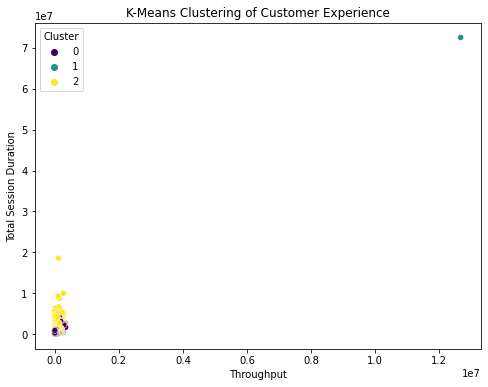

In [52]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(customer_experience[['TCP Retransmission', 'RTT', 'Throughput', 'Total Session Duration']])

# Assign cluster labels to the DataFrame
customer_experience['Cluster'] = kmeans.labels_

# Analyze the characteristics of each cluster
cluster_descriptions = []
for i in range(3):
  cluster_data = customer_experience[customer_experience['Cluster'] == i]
  tcp_retransmission_mean = cluster_data['TCP Retransmission'].mean()
  rtt_mean = cluster_data['RTT'].mean()
  throughput_mean = cluster_data['Throughput'].mean()
  session_duration_mean = cluster_data['Total Session Duration'].mean()

  description = f"Cluster {i}:\n" \
                f"- Average TCP Retransmission: {tcp_retransmission_mean:.2f}\n" \
                f"- Average RTT: {rtt_mean:.2f}\n" \
                f"- Average Throughput: {throughput_mean:.2f}\n" \
                f"- Average Total Session Duration: {session_duration_mean:.2f}\n"

  cluster_descriptions.append(description)

for description in cluster_descriptions:
  print(description)

# Visualize the clusters using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Throughput', y='Total Session Duration', hue='Cluster', data=customer_experience, palette='viridis')
plt.title('K-Means Clustering of Customer Experience')
plt.xlabel('Throughput')
plt.ylabel('Total Session Duration')
plt.show()


 **Write a Python program to assign:**
 
**4.a. engagement score to each user. Consider the engagement score as the**

**Euclidean distance between the user data point & the less engaged cluster (use**

**the first clustering for this)**

In [53]:


# Assuming 'customer_engagement' DataFrame contains user data with engagement metrics
# and 'kmeans' is the fitted KMeans model from your previous code

# Calculate Euclidean distance between each user and the less engaged cluster centroid
less_engaged_centroid = kmeans.cluster_centers_[0]  # Assuming cluster 0 represents the less engaged group
user_engagement_scores = []
for index, row in customer_engagement.iterrows():
    user_data = row[['Total Session Duration', 'Total DL (Bytes)', 'Total UL (Bytes)', 'Number of Sessions']]
    euclidean_distance = np.linalg.norm(user_data - less_engaged_centroid)
    user_engagement_scores.append(euclidean_distance)

# Assign engagement scores to each user
customer_engagement['Engagement Score'] = user_engagement_scores

# Print the DataFrame with the added 'Engagement Score' column
customer_engagement

,Total Session Duration,Total DL (Bytes),Total UL (Bytes),Number of Sessions,Cluster,Engagement Score
MSISDN/Number,,,,,,
3.360100e+10,1.167200e+05,8.426375e+08,3.605311e+07,1,0,8.435484e+08
3.360100e+10,1.812300e+05,1.207552e+08,3.610446e+07,1,0,1.269632e+08
3.360100e+10,1.349690e+05,5.566597e+08,3.930682e+07,1,0,5.582567e+08
3.360101e+10,4.987800e+04,4.019932e+08,2.032753e+07,1,0,4.028032e+08
3.360101e+10,3.710400e+04,1.363130e+09,9.428053e+07,2,0,1.366474e+09
...,...,...,...,...,...,...
3.379000e+10,1.409880e+05,4.445751e+08,3.573224e+07,1,0,4.462727e+08
4.188282e+10,7.255100e+07,4.873783e+11,4.436642e+10,1066,1,4.893935e+11
3.197021e+12,8.773850e+05,1.948281e+08,3.729592e+07,1,2,1.989029e+08


**Experience score for each user. Consider the experience score as the Euclidean**

**Distance between the user data point & the worst experience cluster.**

In [54]:
# Assuming 'customer_engagement' DataFrame contains user data with engagement metrics
# and 'kmeans' is the fitted KMeans model from your previous code

# Find the centroid of the cluster with the lowest average engagement
worst_experience_cluster_index = customer_experience.groupby('Cluster')['TCP Retransmission'].mean().idxmax()
worst_experience_centroid = kmeans.cluster_centers_[worst_experience_cluster_index]

# Calculate Euclidean distance between each user and the worst experience cluster centroid
user_experience_scores = []
for index, row in customer_experience.iterrows():
    user_data = row[['TCP Retransmission', 'RTT', 'Throughput', 'Total Session Duration']]
    euclidean_distance = np.linalg.norm(user_data - worst_experience_centroid)
    user_experience_scores.append(euclidean_distance)

# Assign experience scores to each user
customer_experience['Customer Experience Score'] = user_experience_scores

# Print the DataFrame with the added 'Customer Experience Score' column
customer_experience

,TCP Retransmission,RTT,Throughput,Total Session Duration,Cluster,Customer Experience Score
MSISDN/Number,,,,,,
3.360100e+10,2.156957e+07,46.000000,7.600000e+01,1.167200e+05,0,9.626329e+09
3.360100e+10,2.156957e+07,31.000000,9.900000e+01,1.812300e+05,0,9.626328e+09
3.360100e+10,2.156957e+07,127.458589,9.700000e+01,1.349690e+05,0,9.626329e+09
3.360101e+10,7.607247e+05,84.000000,2.480000e+02,4.987800e+04,0,9.647138e+09
3.360101e+10,3.094040e+07,119.000000,1.513347e+04,3.710400e+04,0,9.616959e+09
...,...,...,...,...,...,...
3.379000e+10,2.156957e+07,40.000000,1.160000e+02,1.409880e+05,0,9.626329e+09
4.188282e+10,9.647617e+09,108735.660124,1.268057e+07,7.255100e+07,1,0.000000e+00
3.197021e+12,2.156957e+07,127.458589,1.000000e+00,8.773850e+05,0,9.626323e+09


**Plotting the Aggregate the average satisfaction & experience score per cluster**

**Task 4.2- Consider the average of both engagement & experience scores as the satisfaction
score & report the top 10 satisfied customer**

In [57]:

# Calculate the average of Engagement Score and Customer Experience Score as Satisfaction Score
customer_satisfaction = pd.merge(customer_engagement, customer_experience, on='MSISDN/Number', how='inner')
customer_satisfaction['Satisfaction Score'] = (customer_satisfaction['Engagement Score'] + customer_satisfaction['Customer Experience Score']) / 2

# Report the top 10 satisfied customers
top_10_satisfied_customers = customer_satisfaction.sort_values('Satisfaction Score', ascending=False).head(10)
top_10_satisfied_customers

,Total Session Duration_x,Total DL (Bytes),Total UL (Bytes),Number of Sessions,Cluster_x,Engagement Score,TCP Retransmission,RTT,Throughput,Total Session Duration_y,Cluster_y,Customer Experience Score,Satisfaction Score
MSISDN/Number,,,,,,,,,,,,,
4.188282e+10,7.255100e+07,4.873783e+11,4.436642e+10,1066,1,4.893935e+11,9.647617e+09,108735.660124,1.268057e+07,7.255100e+07,1,0.000000e+00,2.446967e+11
3.361489e+10,9.966898e+06,8.156743e+09,6.894830e+08,17,2,8.185833e+09,1.344178e+08,1398.751534,2.698814e+05,9.966898e+06,2,9.513414e+09,8.849623e+09
3.376054e+10,9.279434e+06,7.811295e+09,7.034786e+08,15,2,7.842910e+09,2.502067e+08,1839.044479,1.001205e+05,9.279434e+06,2,9.397632e+09,8.620271e+09
3.362578e+10,1.855375e+07,7.770043e+09,7.295774e+08,17,2,7.804220e+09,2.621829e+08,735.458589,1.169899e+05,1.855375e+07,2,9.385598e+09,8.594909e+09
3.367588e+10,4.865947e+06,7.309542e+09,5.815688e+08,15,2,7.332648e+09,1.673531e+08,1062.000000,2.035940e+05,4.865947e+06,2,9.480514e+09,8.406581e+09
3.362632e+10,8.791927e+06,7.301517e+09,6.696507e+08,18,2,7.332162e+09,2.368500e+08,1314.668712,1.213450e+05,8.791927e+06,2,9.410992e+09,8.371577e+09
3.365973e+10,4.035428e+06,7.081602e+09,6.242603e+08,16,2,7.109072e+09,8.964743e+07,1078.000000,1.591899e+05,4.035428e+06,2,9.558224e+09,8.333648e+09
3.366646e+10,4.536757e+06,6.903440e+09,4.050610e+08,11,2,6.915321e+09,1.309977e+08,745.834356,1.361799e+05,4.536757e+06,2,9.516871e+09,8.216096e+09
3.376041e+10,5.321667e+06,6.610852e+09,5.215189e+08,12,2,6.631397e+09,1.152027e+08,1076.834356,2.303760e+05,5.321667e+06,2,9.532660e+09,8.082029e+09


**Task 4.3- Build a regression model of your choice to predict the satisfaction score of a customer. linear and XGBOOST, find the Mean square error and r2 value for both the models**

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Assuming 'customer_satisfaction' DataFrame is available with 'Satisfaction Score' as the target variable.
# Select features and target variable
X = customer_satisfaction[['Engagement Score', 'Customer Experience Score']]  # Replace with relevant features
y = customer_satisfaction['Satisfaction Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

# Calculate Mean Squared Error and R-squared for Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression:")
print("Mean Squared Error:", mse_linear)
print("R-squared:", r2_linear)

# XGBoost Regression
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)

# Calculate Mean Squared Error and R-squared for XGBoost Regression
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\nXGBoost Regression:")
print("Mean Squared Error:", mse_xgb)
print("R-squared:", r2_xgb)

Linear Regression:
Mean Squared Error: 5.470075283824265e-13
R-squared: 1.0

XGBoost Regression:
Mean Squared Error: 3215579745129.911
R-squared: 0.9999364957423311


**Run a k-means (k=2) on the engagement & the experience score**
**Aggregate the average satisfaction & experience score per cluster**

In [59]:
engagement_experience_df = pd.merge(customer_engagement[['Engagement Score']], customer_experience[['Customer Experience Score']], 
                                    left_index=True, right_index=True)

# Perform K-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(engagement_experience_df)

# Assign cluster labels to the DataFrame
engagement_experience_df['Cluster'] = kmeans.labels_

# Print the cluster assignments for each user (optional)
print(engagement_experience_df)

# Analyze the characteristics of each cluster (optional)
for cluster_label in range(2):
    cluster_data = engagement_experience_df[engagement_experience_df['Cluster'] == cluster_label]
    print(f"\nCluster {cluster_label}:")
    print(f"- Average Engagement Score: {cluster_data['Engagement Score'].mean():.2f}")
    print(f"- Average Customer Experience Score: {cluster_data['Customer Experience Score'].mean():.2f}")

               Engagement Score  Customer Experience Score  Cluster
MSISDN/Number                                                      
3.360100e+10       8.435484e+08               9.626329e+09        0
3.360100e+10       1.269632e+08               9.626328e+09        0
3.360100e+10       5.582567e+08               9.626329e+09        0
3.360101e+10       4.028032e+08               9.647138e+09        0
3.360101e+10       1.366474e+09               9.616959e+09        0
...                         ...                        ...      ...
3.379000e+10       4.462727e+08               9.626329e+09        0
4.188282e+10       4.893935e+11               0.000000e+00        1
3.197021e+12       1.989029e+08               9.626323e+09        0
3.370000e+14       5.428140e+08               9.626328e+09        0
8.823971e+14       1.003062e+08               9.626323e+09        0

[106857 rows x 3 columns]

Cluster 0:
- Average Engagement Score: 637972695.44
- Average Customer Experience Score:

**Visualize the clusters using a scatter plot**

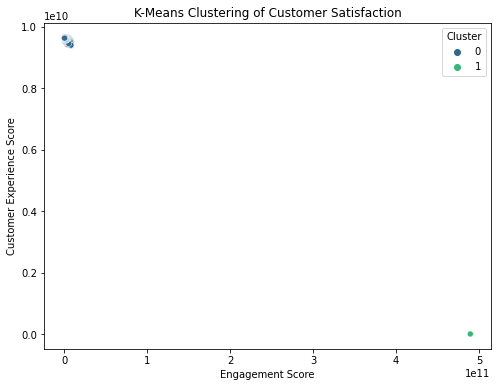

In [60]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Engagement Score', y='Customer Experience Score', hue='Cluster', data=engagement_experience_df, palette='viridis')
plt.title('K-Means Clustering of Customer Satisfaction')
plt.xlabel('Engagement Score')
plt.ylabel('Customer Experience Score')
plt.show()

In [61]:
customer_satisfaction

,Total Session Duration_x,Total DL (Bytes),Total UL (Bytes),Number of Sessions,Cluster_x,Engagement Score,TCP Retransmission,RTT,Throughput,Total Session Duration_y,Cluster_y,Customer Experience Score,Satisfaction Score
MSISDN/Number,,,,,,,,,,,,,
3.360100e+10,1.167200e+05,8.426375e+08,3.605311e+07,1,0,8.435484e+08,2.156957e+07,46.000000,7.600000e+01,1.167200e+05,0,9.626329e+09,5.234939e+09
3.360100e+10,1.812300e+05,1.207552e+08,3.610446e+07,1,0,1.269632e+08,2.156957e+07,31.000000,9.900000e+01,1.812300e+05,0,9.626328e+09,4.876646e+09
3.360100e+10,1.349690e+05,5.566597e+08,3.930682e+07,1,0,5.582567e+08,2.156957e+07,127.458589,9.700000e+01,1.349690e+05,0,9.626329e+09,5.092293e+09
3.360101e+10,4.987800e+04,4.019932e+08,2.032753e+07,1,0,4.028032e+08,7.607247e+05,84.000000,2.480000e+02,4.987800e+04,0,9.647138e+09,5.024970e+09
3.360101e+10,3.710400e+04,1.363130e+09,9.428053e+07,2,0,1.366474e+09,3.094040e+07,119.000000,1.513347e+04,3.710400e+04,0,9.616959e+09,5.491716e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3.379000e+10,1.409880e+05,4.445751e+08,3.573224e+07,1,0,4.462727e+08,2.156957e+07,40.000000,1.160000e+02,1.409880e+05,0,9.626329e+09,5.036301e+09
4.188282e+10,7.255100e+07,4.873783e+11,4.436642e+10,1066,1,4.893935e+11,9.647617e+09,108735.660124,1.268057e+07,7.255100e+07,1,0.000000e+00,2.446967e+11
3.197021e+12,8.773850e+05,1.948281e+08,3.729592e+07,1,2,1.989029e+08,2.156957e+07,127.458589,1.000000e+00,8.773850e+05,0,9.626323e+09,4.912613e+09


**Aggregate the average satisfaction & experience score per cluster**

In [62]:
cluster_satisfaction_experience = customer_satisfaction.groupby('Cluster_x').agg({
    'Satisfaction Score': 'mean',
    'Customer Experience Score': 'mean'
})

cluster_satisfaction_experience

,Satisfaction Score,Customer Experience Score
Cluster_x,,
0,5.093841e+09,9.629876e+09
1,2.446967e+11,0.000000e+00
2,5.549639e+09,9.603321e+09


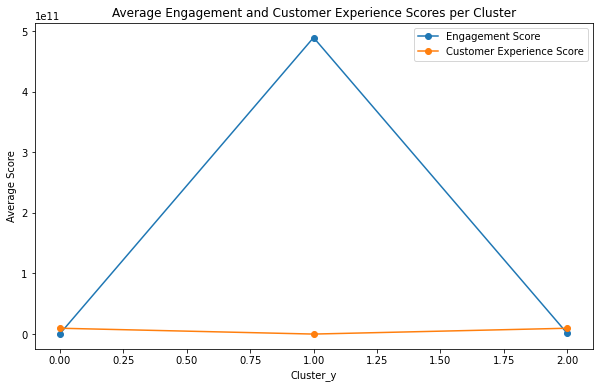

In [66]:

cluster_satisfaction = customer_satisfaction.groupby('Cluster_y').agg({
    'Engagement Score': 'mean',
    'Customer Experience Score': 'mean'
}).reset_index()

# Plot the average satisfaction and experience scores per cluster
plt.figure(figsize=(10, 6))
plt.plot(cluster_satisfaction['Cluster_y'], cluster_satisfaction['Engagement Score'], marker='o', label='Engagement Score')
plt.plot(cluster_satisfaction['Cluster_y'], cluster_satisfaction['Customer Experience Score'], marker='o', label='Customer Experience Score')
plt.xlabel('Cluster_y')
plt.ylabel('Average Score')
plt.title('Average Engagement and Customer Experience Scores per Cluster')
plt.legend()
plt.show()

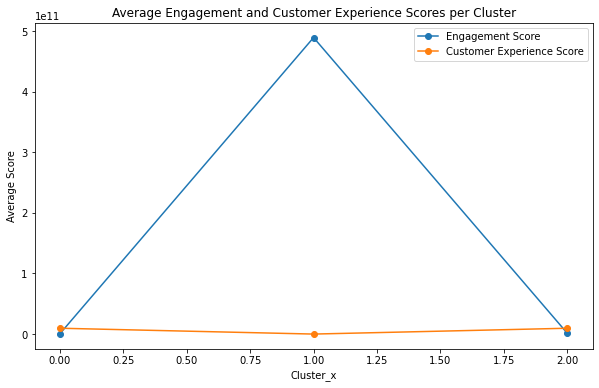

In [68]:

cluster_satisfaction = customer_satisfaction.groupby('Cluster_x').agg({
    'Engagement Score': 'mean',
    'Customer Experience Score': 'mean'
}).reset_index()

# Plot the average satisfaction and experience scores per cluster
plt.figure(figsize=(10, 6))
plt.plot(cluster_satisfaction['Cluster_x'], cluster_satisfaction['Engagement Score'], marker='o', label='Engagement Score')
plt.plot(cluster_satisfaction['Cluster_x'], cluster_satisfaction['Customer Experience Score'], marker='o', label='Customer Experience Score')
plt.xlabel('Cluster_x')
plt.ylabel('Average Score')
plt.title('Average Engagement and Customer Experience Scores per Cluster')
plt.legend()
plt.show()

**create a  final table containing only user ID + engagement, experience &**
**satisfaction scores**

In [71]:
final_table = pd.merge(customer_engagement[['Engagement Score']], 
                       customer_experience[['Customer Experience Score']], 
                       on='MSISDN/Number', how='inner')

In [72]:
final_table

,Engagement Score,Customer Experience Score
MSISDN/Number,,
3.360100e+10,8.435484e+08,9.626329e+09
3.360100e+10,1.269632e+08,9.626328e+09
3.360100e+10,5.582567e+08,9.626329e+09
3.360101e+10,4.028032e+08,9.647138e+09
3.360101e+10,1.366474e+09,9.616959e+09
...,...,...
3.379000e+10,4.462727e+08,9.626329e+09
4.188282e+10,4.893935e+11,0.000000e+00
3.197021e+12,1.989029e+08,9.626323e+09


In [76]:
final_table['satisfaction_score']=(final_table['Engagement Score'] + final_table['Customer Experience Score']) / 2

In [83]:

df1=final_table.to_csv('Customer Insight Table.csv')


In [85]:
df1

In [73]:
!pip install mysql-connector-python

**Export your final table containing all user ID + engagement, experience &**

**satisfaction scores in your local MySQL database. Report a screenshot of a select query output**
 **on the exported table **

In [ ]:
import mysql.connector

# Replace with your database credentials
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="root",
  database="Telecom"
)
#print(mydb)
mycursor = mydb.cursor()

# Assuming customer_engagement DataFrame is defined
for index, row in customer_engagement.iterrows():
    user_id = row['MSISDN/Number']  # Assuming 'MSISDN/Number' is your user ID column
    engagement_score = row['Engagement Score']
    experience_score = row['Experience Score']
    satisfaction_score = row['Satisfaction Score']
    sql = "INSERT INTO customer_scores (user_id, engagement_score, experience_score, satisfaction_score) VALUES (%s, %s, %s, %s)"
    val = (user_id, engagement_score, experience_score, satisfaction_score)
    mycursor.execute(sql, val)
mycursor.execute(create_table_query)

mydb.commit()



# Screenshot of the select query output will be manually captured after running this code.

In [ ]:
print(mycursor.rowcount, "was inserted.")

# Select query for the exported table (replace your_database and customer_scores with your table details)
sql = "SELECT * FROM Telecom.customer_scores"
mycursor.execute(sql)
myresult = mycursor.fetchall()

for x in myresult:
x